# Machine Learning Project 
**GPU Gaming Performance Measurement**
Using two different sets of data (GPU Performance and GPU Specifications) to
train the computer to be able to approximate the " Effective 3D Gaming GPU
Speed " percentage of new GPUs defined by Specifications

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})
import warnings
warnings.filterwarnings('ignore')


## Functions
**Having pre-defined functions saves me time and effort when visualizing my data, and allows me to quickly and accurately represent my findings.**

In [2]:
test_split_fixed=0.5

In [3]:
def score_all(y_test,y_pred):
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
    from sklearn.model_selection import train_test_split

    # Evaluate the model's performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("Mean absolute error: {:.2f}".format(mae))
    print("Mean squared error: {:.2f}".format(mse))
    print("Root mean squared error: {:.2f}".format(rmse))
    print("R2 score: {:.2f}".format(r2))

In [4]:
def plot_mean_absolute_error(expected,predicted):
    from sklearn.metrics import mean_absolute_error
    # calculate errors
    errors = list()
    for i in range(len(expected)):
     # calculate error
     err = abs((expected[i] - predicted[i]))
     # store error
     errors.append(err)
     # report error
    #  print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
    # plot errors
    errors.sort()
    plt.plot(errors)
    # pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
    plt.xlabel('')
    plt.ylabel('Mean Absolute Error')
    plt.show()

In [5]:
def plot_mean_squared_error(expected,predicted):
    from sklearn.metrics import mean_squared_error
    # calculate errors
    errors = list()
    for i in range(len(expected)):
     # calculate error
     err = (expected[i] - predicted[i])**2
     # store error
     errors.append(err)
     # report error
    #  print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
    # plot errors
    errors.sort()
    plt.plot(errors)
    # pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
    plt.xlabel('')
    plt.ylabel('Mean Squared Error')
    plt.show()

In [6]:
def plot_accuracy_scatter(expected,predicted):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    # Creates a figure
    fig=plt.figure(figsize=(11,11)) 
    ax=fig.add_axes([1,1,1,1])
    x=np.arange(max(max(predicted),max(expected)))
    ax.plot(x,x,color='darkorange',linestyle="--")
    target_line = mpatches.Patch(color='darkorange', label='Target Line')
    ax.legend(handles=[target_line])

    ax.scatter(expected,predicted)
    plt.xlabel('Expected')
    plt.ylabel('Predicted')
    plt.show()

In [7]:
def plot_accuracy_scatter_test_vs_train(test_expected,test_predicted,train_expected,train_predicted,Name):
    # Creates a figure
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    # Creates a figure
    fig=plt.figure(figsize=(11,11)) 
    ax=fig.add_axes([1,1,1,1])
    x=np.arange(max(max(test_predicted),max(test_expected)))
    ax.plot(x,x,color='darkorange',linestyle="--")
    target_line = mpatches.Patch(color='darkorange', label='Target Line')
    ax.legend(handles=[target_line])
    ax.scatter(test_expected,test_predicted)
    
    
    x=np.arange(max(max(train_predicted),max(train_expected)))
    ax.plot(x,x,color='darkorange',linestyle="--")
    target_line = mpatches.Patch(color='darkorange', label='Target Line')
    test_scatter = mpatches.Patch(color='red', label='Test Scatter')
    train_scatter = mpatches.Patch(color='blue', label='Train Scatter')

    ax.legend(handles=[target_line,test_scatter,train_scatter])

    ax.scatter(train_expected,train_predicted)
    plt.title(Name)
    plt.xlabel('Expected')
    plt.ylabel('Predicted')
    plt.savefig(f'{Name}.png',dpi=500,bbox_inches='tight', pad_inches=0)
    plt.show()

## scatter matrix custom
**Scatter matrix fuction same as scatter_matrix in pandas.plotting**

In [8]:
def scatter_matrix_custom(data_frame,attributes,fig_size=(50,50)):
    %matplotlib inline
    fig,ax=plt.subplots(nrows=len(attributes)-1, ncols=len(attributes)-1,figsize=fig_size)
    for i in range(len(attributes)-1):
        for j in range(len(attributes)-1):
            if(i==j):
                ax[i,j].hist(data_frame[attributes[i]])
            else:
                ax[i,j].scatter(data_frame[attributes[j]],data_frame[attributes[i]])
            if(i==len(attributes)-2):
                ax[i,j].set(xlabel=attributes[j])
            if(j==0):
                ax[i,j].set(ylabel=attributes[i])
#     plt.savefig(f'scatter_matrix_custom.png',dpi=700)

In [9]:
def score_cross_validation(MODEL,X,y):
    from sklearn.model_selection import ShuffleSplit
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    # Evaluting a model using cross-validation is possible with cross_val_score
    from sklearn.model_selection import cross_val_score
    # scoring=None means default score() metric is used
    cross_value=cross_val_score(estimator=MODEL,X=X,y=y,cv=cv,scoring=None)
    #  scoring="precision"
    #  scoring='neg_mean_squared_error'
    return np.sum(cross_value)/len(cross_value)

In [10]:
benchmarks_index=pd.read_csv("Datasets/GPU_UserBenchmarks_MOD.csv")
specifications_GPU=pd.read_csv("Datasets/gpu_specs_v6_MOD.csv")

## Preparing and Cleaning Data 


What is GPU Specifications Dataset ?: Data containing graphics card specifications
<br>**GPU Specifications Validation**

In [11]:
specifications_GPU.count()

Model          2889
memSize        2477
memBusWidth    2477
gpuClock       2889
memClock       2477
tmu            2889
rop            2889
igp            2889
bus            2889
memType        2889
gpuChip        2889
dtype: int64

In [12]:
# Clean rows contains Nan
specifications_GPU.dropna(inplace=True)
specifications_GPU.count()

Model          2477
memSize        2477
memBusWidth    2477
gpuClock       2477
memClock       2477
tmu            2477
rop            2477
igp            2477
bus            2477
memType        2477
gpuChip        2477
dtype: int64

What is GPU Benchmarks Dataset ?: Data containing a label value (Index Benchmarks)
<br>**GPU Benchmarks Check Validation**

In [13]:
benchmarks_index.count()

Brand        1291
Model        1291
Rank         1291
Benchmark    1291
Samples      1291
dtype: int64

**Merge the intersection data in the two Datasets (GPU Specifications and GPU Benchmarks)**
<br>
by using the method "`merge(how='inner',on="Model")`"based on the column "Model" to collect the data "intersection (inner)" in both datasets.

In [14]:
data_intersection =pd.merge(benchmarks_index, specifications_GPU,how='inner',on="Model")

In [15]:
data_intersection=data_intersection.drop("Rank",axis=1)
data_intersection=data_intersection.drop("Samples",axis=1)

**Example GPU `"RTX 3060"` in Both dataset look like**

In [16]:
benchmarks_index[benchmarks_index["Model"]=="RTX 3060"]

,Brand,Model,Rank,Benchmark,Samples
186,Nvidia,RTX 3060,44,98.3,232735


In [17]:
specifications_GPU[specifications_GPU["Model"]=="RTX 3060"]

,Model,memSize,memBusWidth,gpuClock,memClock,tmu,rop,igp,bus,memType,gpuChip
79,RTX 3060,12.0,192.0,1320,1875.0,112,48,No,PCIe 4.0 x16,GDDR6,GA106


In [18]:
# NEW DATASET
data_intersection[data_intersection["Model"]=="RTX 3060"]

,Brand,Model,Benchmark,memSize,memBusWidth,gpuClock,memClock,tmu,rop,igp,bus,memType,gpuChip
20,Nvidia,RTX 3060,98.3,12.0,192.0,1320,1875.0,112,48,No,PCIe 4.0 x16,GDDR6,GA106


In [19]:
data_intersection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        410 non-null    object 
 1   Model        410 non-null    object 
 2   Benchmark    410 non-null    float64
 3   memSize      410 non-null    float64
 4   memBusWidth  410 non-null    float64
 5   gpuClock     410 non-null    int64  
 6   memClock     410 non-null    float64
 7   tmu          410 non-null    int64  
 8   rop          410 non-null    int64  
 9   igp          410 non-null    object 
 10  bus          410 non-null    object 
 11  memType      410 non-null    object 
 12  gpuChip      410 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 41.8+ KB


In [20]:
data_intersection.count()

Brand          410
Model          410
Benchmark      410
memSize        410
memBusWidth    410
gpuClock       410
memClock       410
tmu            410
rop            410
igp            410
bus            410
memType        410
gpuChip        410
dtype: int64

In [21]:
data_intersection["memType"].value_counts()

memType
GDDR5     146
GDDR3     110
DDR3       82
DDR2       34
GDDR6      23
GDDR6X      5
GDDR5X      4
DDR         4
HBM2        1
GDDR4       1
Name: count, dtype: int64

In [22]:
data_intersection["gpuChip"].value_counts()

gpuChip
GF108       24
GK104       20
GK107       18
G92         13
GT218       11
            ..
Pinewood     1
Madison      1
G94B         1
GK110        1
NV44B        1
Name: count, Length: 109, dtype: int64

## Visualization

**Analysis how data looks**

In [23]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [24]:
plt.style.use("ggplot")


<Axes: >

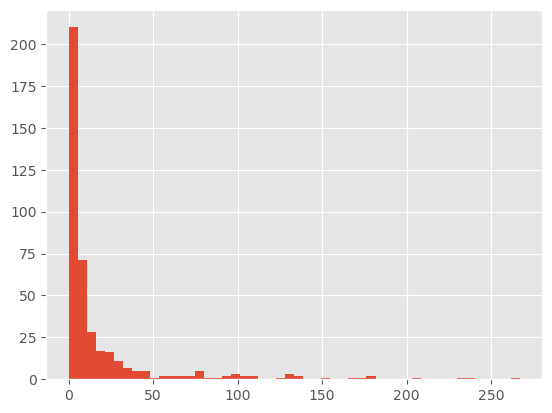

In [25]:
data_intersection["Benchmark"].hist(bins=50)

**Note** : As you see the graphs show most of the graphics cards is Benchmarks between 0 and 25 that mean there imbalance in the data (Olds Graphics Cards more then news).
<br>Later on, I will add some graphics cards between 150\~300 cards manuals

## Balance the Data
**Data Collection**
<br>I added new graphics cards `Benchmark value` manually to try to balance the data
<br>I will add more during the `Data Collection` and `Modeling` stage to get the best result

In [26]:
extra_data=pd.read_csv("Datasets/b_gpu_specs_v6.csv")
extra_data.head()

,Brand,Model,Benchmark,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,igp,bus,memType,gpuChip
0,Intel,Arc A380,33.9,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,No,PCIe 4.0 x8,GDDR6,DG2-128
1,Intel,Arc A770,88.6,2022.0,16.0,256.0,300,1500.0,4096.0,256,128,No,PCIe 4.0 x16,GDDR6,DG2-512
2,Intel,Arc A770M,79.6,2022.0,16.0,256.0,300,1500.0,4096.0,256,128,No,PCIe 4.0 x16,GDDR6,DG2-512
3,Intel,Arc A780,NaN,2022.0,16.0,256.0,300,1093.0,4096.0,256,128,No,PCIe 4.0 x16,GDDR6X,DG2-512
4,Intel,Arctic Sound-M,NaN,2022.0,16.0,4096.0,900,1200.0,8192.0,256,128,No,PCIe 4.0 x16,HBM2e,Arctic Sound


In [27]:
extra_data=extra_data.dropna()
extra_data=extra_data.drop("releaseYear",axis=1)
extra_data=extra_data.drop("unifiedShader",axis=1)

extra_data.count()

Brand          182
Model          182
Benchmark      182
memSize        182
memBusWidth    182
gpuClock       182
memClock       182
tmu            182
rop            182
igp            182
bus            182
memType        182
gpuChip        182
dtype: int64

In [28]:
data_balance =pd.merge(data_intersection, extra_data,how='outer',on=["Brand","Model","Benchmark","memSize","memBusWidth","gpuClock","memClock","tmu","memType","gpuChip","igp","bus","rop"])

**Sort the new data**
<br>1.Correct the naming difference in "Brand" Column
<br>2.Sort data by "Benchmark" Column
<br>3.Remove the old index and set new one

In [29]:
data_balance["Brand"]=data_balance["Brand"].str.upper()
data_balance.sort_values(["Benchmark"],ascending=False,inplace=True)
data_balance.reset_index(drop=True,inplace=True)

<Axes: >

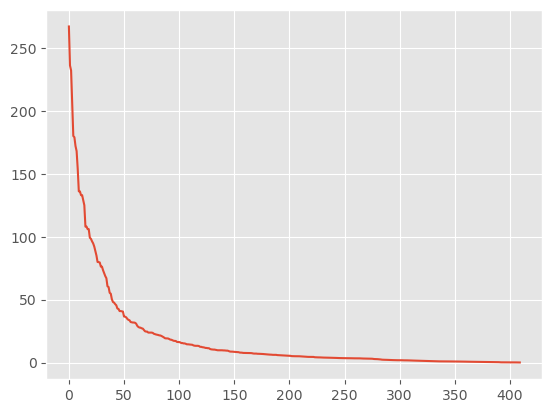

In [30]:
data_intersection["Benchmark"].plot()

<Axes: >

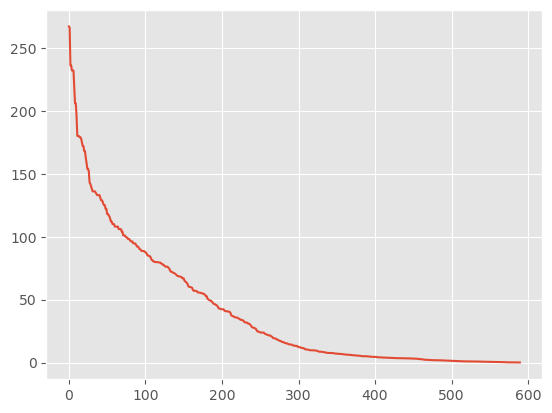

In [31]:
data_balance["Benchmark"].plot()

410

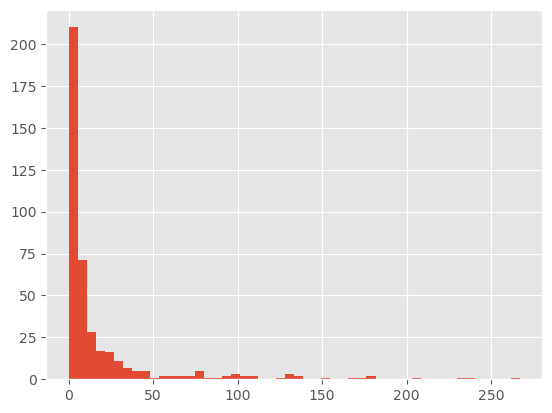

In [32]:
# before new data
data_intersection["Benchmark"].hist(bins=50)
len(data_intersection)

590

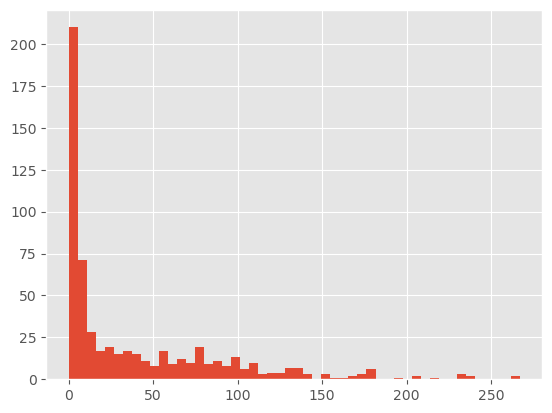

In [33]:
# after new data
data_balance["Benchmark"].hist(bins=50)
len(data_balance)

**As you noticed, there is a difference in the data after adding the new graphics cards**

In [34]:
data_balance["memType"].value_counts()

memType
GDDR5     183
GDDR6     132
GDDR3     110
DDR3       82
DDR2       34
HBM2       19
GDDR5X     13
GDDR6X     12
DDR         4
GDDR4       1
Name: count, dtype: int64

In [35]:
data_balance["gpuChip"].value_counts()

gpuChip
GF108       24
GK104       20
GP104       19
GK107       18
GA102       15
            ..
M97          1
RV670        1
Pitcairn     1
Madison      1
NV44B        1
Name: count, Length: 119, dtype: int64

## Correlation 

In [40]:
# data_balance.corr()

In [41]:
# data_intersection.corr()

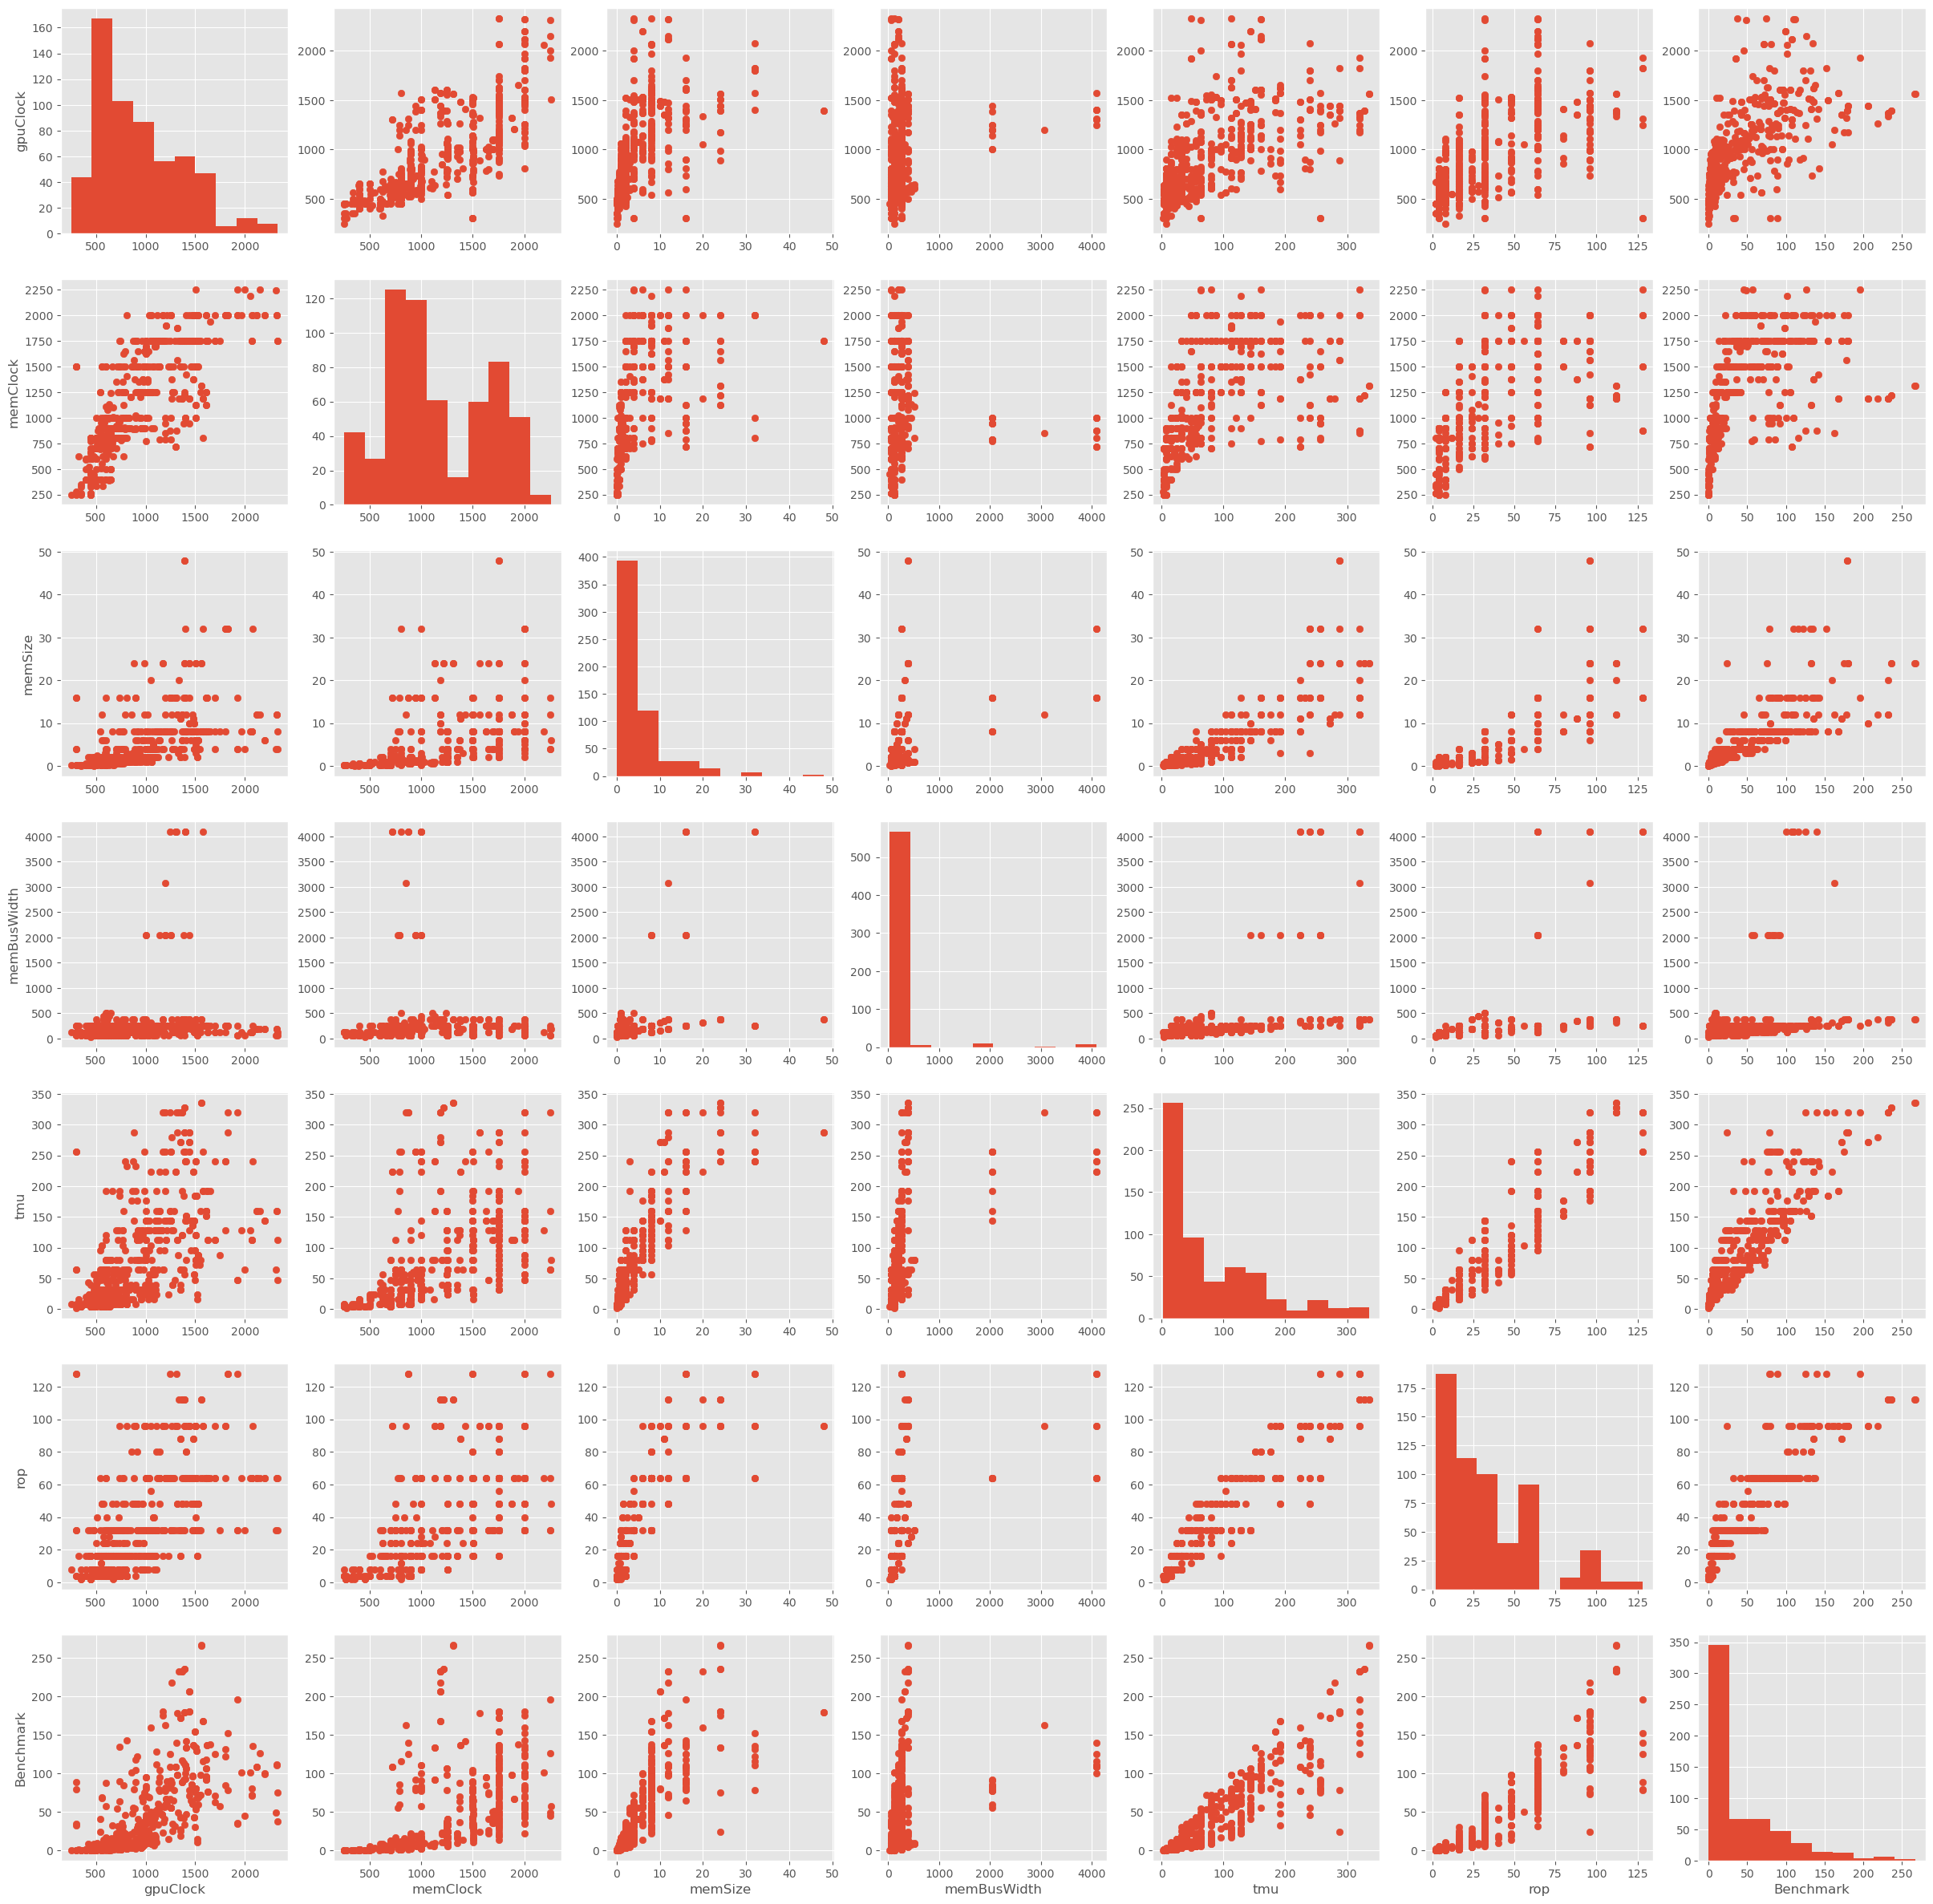

In [42]:
# data_balance
# from pandas.plotting import scatter_matrix
# ["gpuClock","memClock",  "memSize","memBusWidth","tmu","rop","Benchmark","igp"]D30=D30[D30["Benchmark"]>10]
attributes = ["gpuClock","memClock",  "memSize","memBusWidth","tmu","rop","Benchmark","igp"]
# a=scatter_matrix(data_balance[attributes], figsize=(12, 8))

# Plot to each different index
scatter_matrix_custom(data_balance,attributes,fig_size=(30,30))

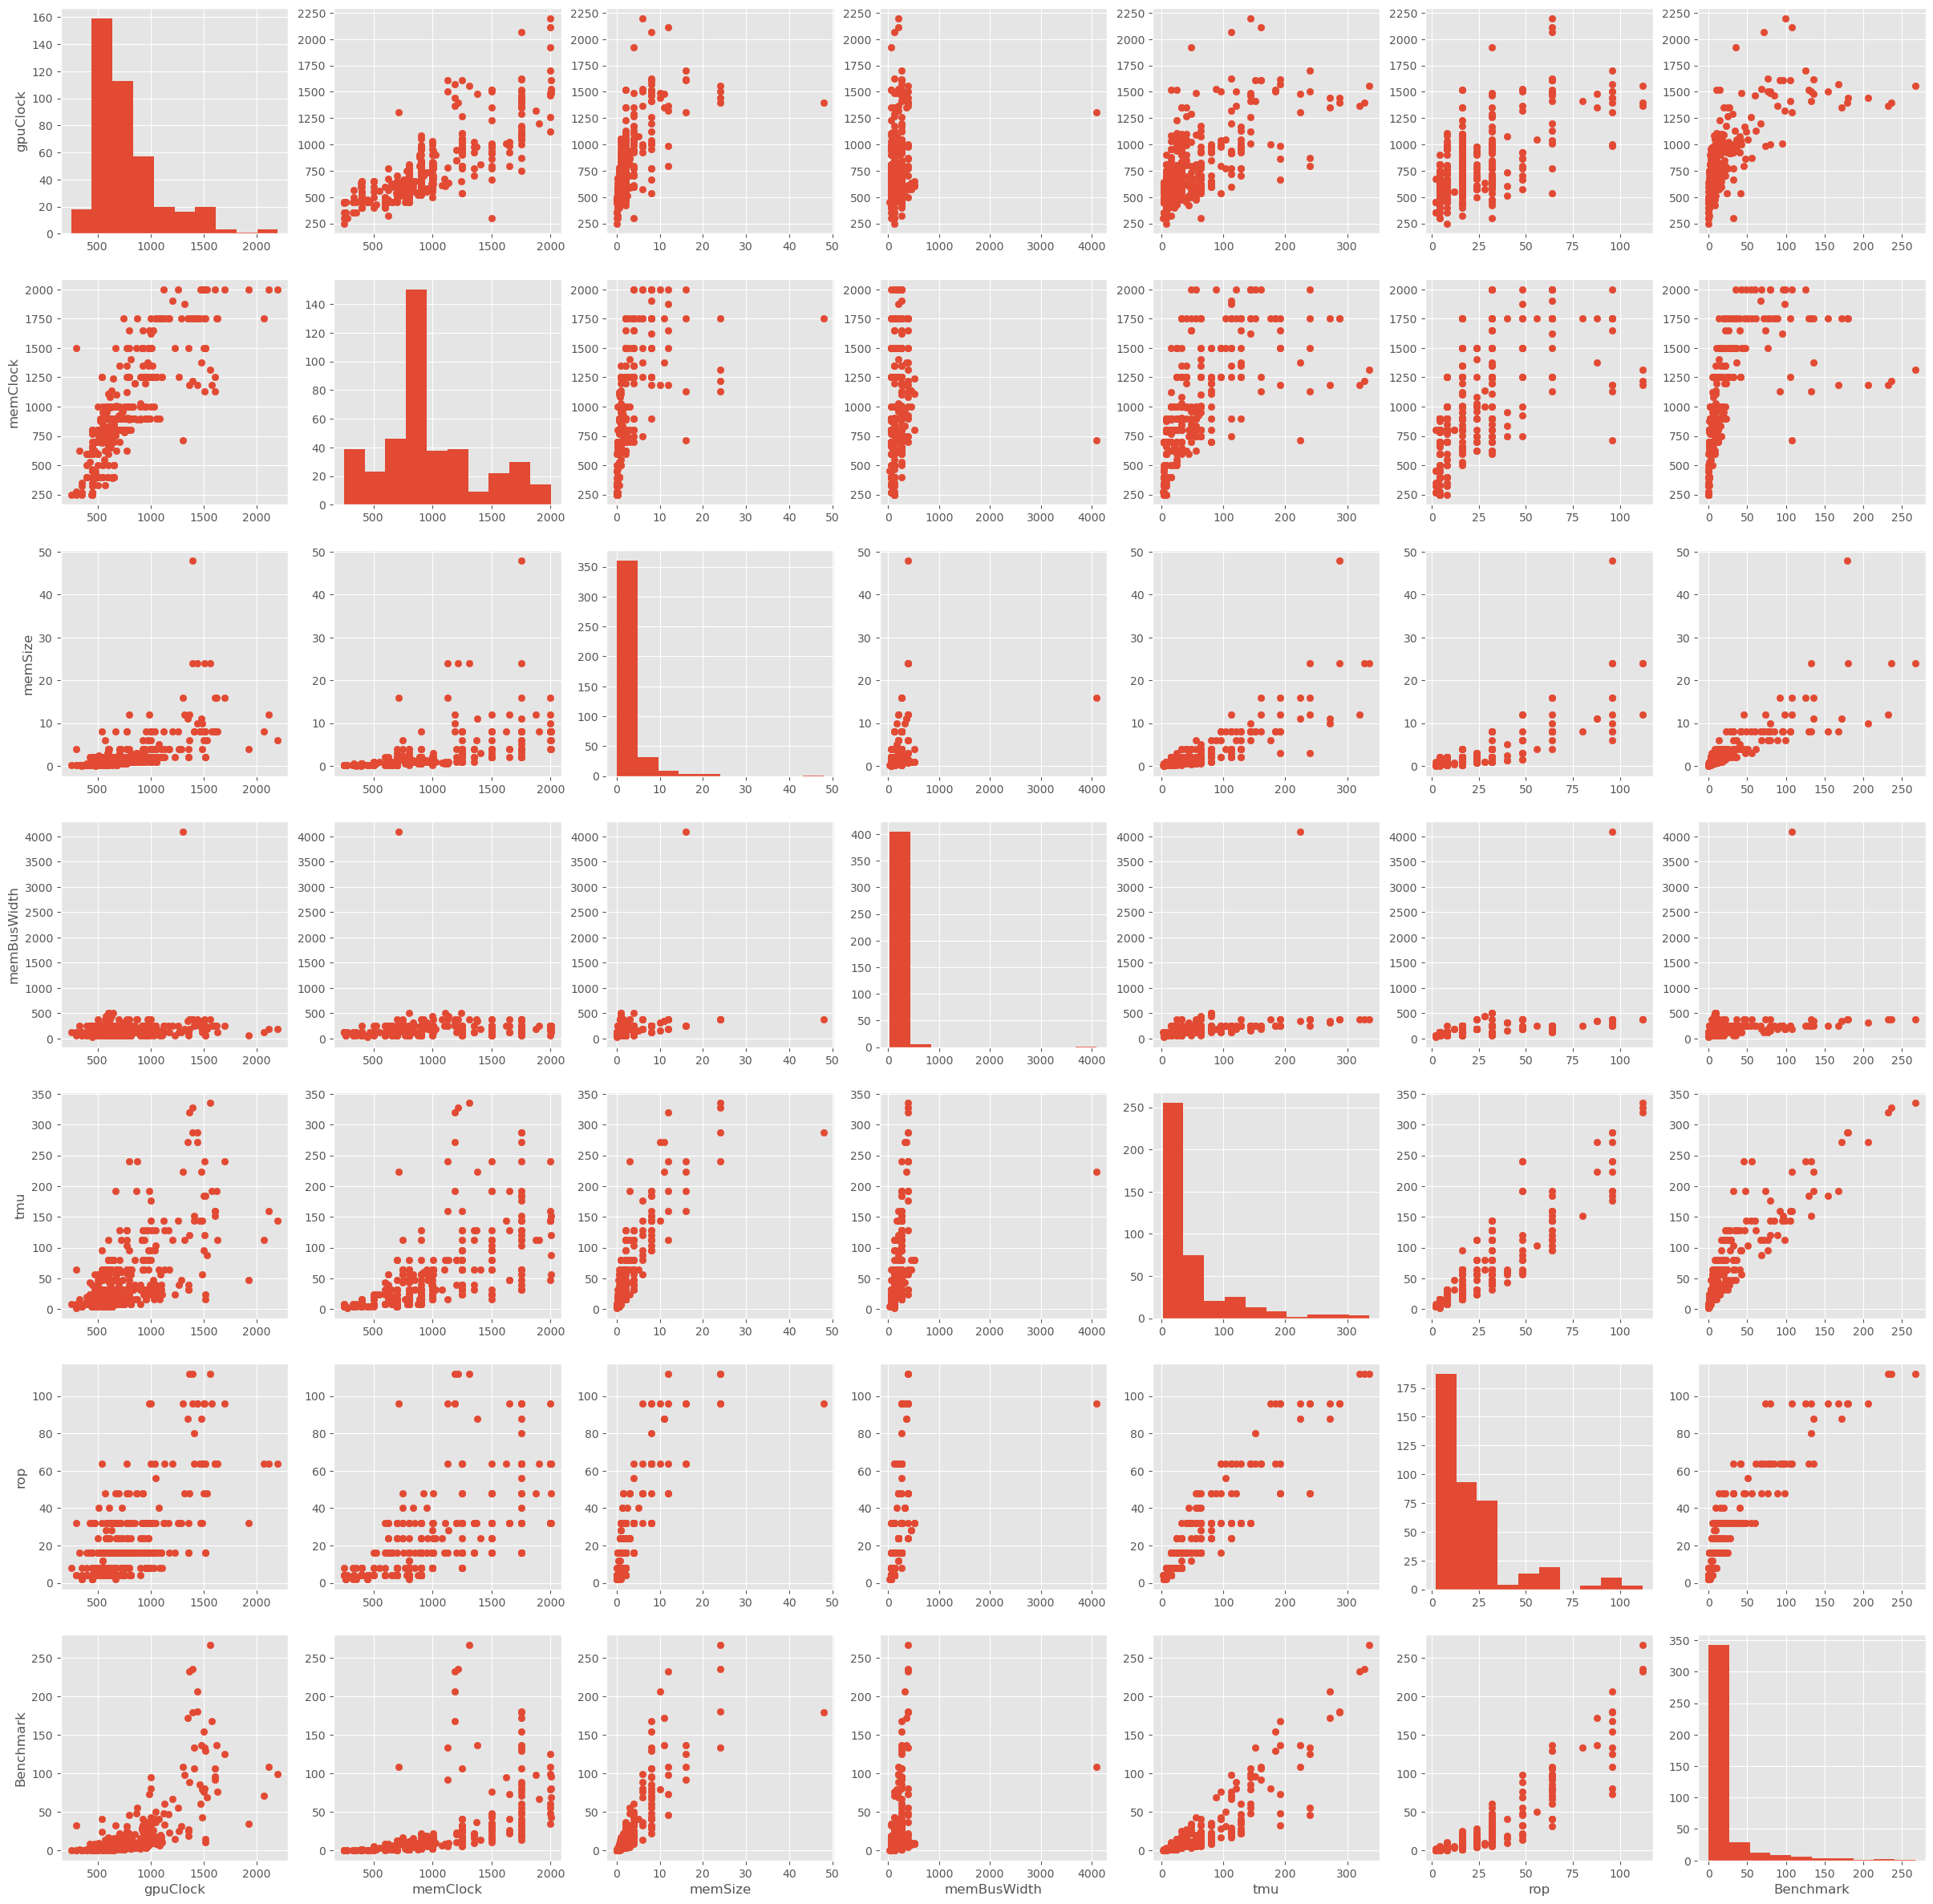

In [43]:
# data_intersection
from pandas.plotting import scatter_matrix
# ["gpuClock","memClock",  "memSize","memBusWidth","tmu","rop","Benchmark","igp"]D30=D30[D30["Benchmark"]>10]
attributes = ["gpuClock","memClock",  "memSize","memBusWidth","tmu","rop","Benchmark","igp"]
# a=scatter_matrix(data_intersection[attributes], figsize=(30 30))
scatter_matrix_custom(data_intersection,attributes,fig_size=(30,30))

In [44]:
data_balance.std()

TypeError: could not convert string to float: 'PCIe 4.0 x16'

# Mean

[Text(0.5, 1.0, 'S'), Text(0.5, 0, 'S'), Text(0, 0.5, 'S')]

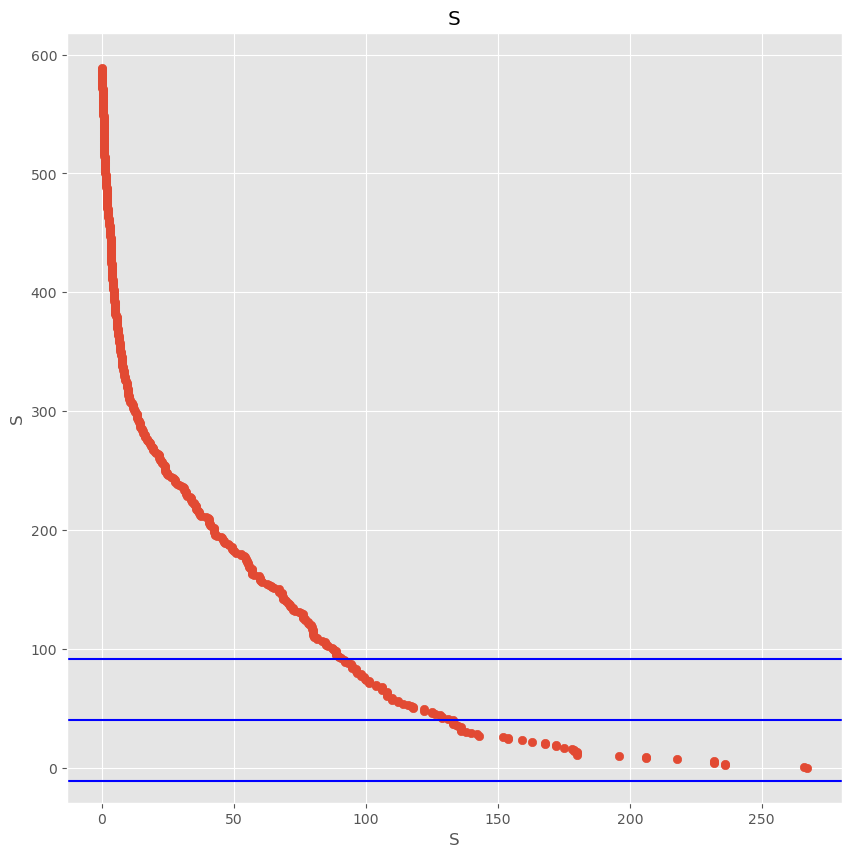

In [ ]:
# OO from scratch
fig,ax=plt.subplots(figsize=(10,10))
scatter=ax.scatter(data_balance["Benchmark"].array,np.arange(0,len(data_balance["Benchmark"].array)))
# Customize the plot
ax.axhline(data_balance["Benchmark"].mean(), color='b', linestyle='-')

ax.axhline(data_balance["Benchmark"].mean()+data_balance["Benchmark"].std(), color='b', linestyle='-')
ax.axhline(data_balance["Benchmark"].mean()-data_balance["Benchmark"].std(), color='b', linestyle='-')

ax.set(title="S",
            xlabel="S",
            ylabel="S")


In [ ]:
data_balance.head(5)

,Brand,Model,Benchmark,memSize,memBusWidth,gpuClock,memClock,tmu,rop,igp,bus,memType,gpuChip
0,NVIDIA,RTX 3090 Ti,267.0,24.0,384.0,1560,1313.0,336,112,No,PCIe 4.0 x16,GDDR6X,GA102
1,NVIDIA,GeForce RTX 3090 Ti,266.0,24.0,384.0,1560,1313.0,336,112,No,PCIe 4.0 x16,GDDR6X,GA102
2,NVIDIA,RTX 3090,236.0,24.0,384.0,1395,1219.0,328,112,No,PCIe 4.0 x16,GDDR6X,GA102
3,NVIDIA,GeForce RTX 3090,236.0,24.0,384.0,1395,1219.0,328,112,No,PCIe 4.0 x16,GDDR6X,GA102
4,NVIDIA,GeForce RTX 3080 Ti 20 GB,232.0,20.0,320.0,1335,1188.0,320,112,No,PCIe 4.0 x16,GDDR6X,GA102


# Get Data Ready! 
**Convert String to numeric values** 


In [ ]:
data_balance["memType"].value_counts()

GDDR5     183
GDDR6     132
GDDR3     110
DDR3       82
DDR2       34
HBM2       19
GDDR5X     13
GDDR6X     12
DDR         4
GDDR4       1
Name: memType, dtype: int64

In [45]:
data_balance["memType"]

0      GDDR6X
1      GDDR6X
2      GDDR6X
3      GDDR6X
4      GDDR6X
        ...  
585     GDDR3
586     GDDR3
587      DDR2
588      DDR2
589       DDR
Name: memType, Length: 590, dtype: object

In [46]:
data_balance["memType"].value_counts()

memType
GDDR5     183
GDDR6     132
GDDR3     110
DDR3       82
DDR2       34
HBM2       19
GDDR5X     13
GDDR6X     12
DDR         4
GDDR4       1
Name: count, dtype: int64

In [47]:
data_balance["gpuChip"].value_counts()

gpuChip
GF108       24
GK104       20
GP104       19
GK107       18
GA102       15
            ..
M97          1
RV670        1
Pitcairn     1
Madison      1
NV44B        1
Name: count, Length: 119, dtype: int64

In [48]:
data_balance["bus"].value_counts()

bus
PCIe 3.0 x16    159
PCIe 2.0 x16    157
PCIe 4.0 x16     71
PCIe 1.0 x16     52
MXM-B (3.0)      43
PCIe 4.0 x8      26
MXM-A (3.0)      21
PCIe 3.0 x8      14
MXM-II           11
PCIe 4.0 x4       8
PCIe 3.0 x4       8
MXM-HE            6
PCIe 2.0 x8       6
MXM               4
MXM-I             3
MXM-IV            1
Name: count, dtype: int64

In [49]:
data_ready=data_balance.drop(columns=["Model","Brand","igp","bus","memType","gpuChip"])
# data_ready=data_balance.drop(columns=["Model","Brand","igp"])

data_ready


,Benchmark,memSize,memBusWidth,gpuClock,memClock,tmu,rop
0,267.00,24.000,384.0,1560,1313.0,336,112
1,266.00,24.000,384.0,1560,1313.0,336,112
2,236.00,24.000,384.0,1395,1219.0,328,112
3,236.00,24.000,384.0,1395,1219.0,328,112
4,232.00,12.000,384.0,1365,1188.0,320,112
...,...,...,...,...,...,...,...
585,0.13,0.064,64.0,350,350.0,4,2
586,0.11,0.128,128.0,250,250.0,8,8
587,0.07,0.128,64.0,350,266.0,4,2
588,0.07,0.256,64.0,450,266.0,4,2


# Model! 
After arranging the data,and processing the data for `prediction`
>* LinearRegression
>* KNeighborsRegressor
>* Random Forest
>* Decision Tree

In [50]:
#X Feature 
#Y Label 

In [51]:
X=data_ready.drop("Benchmark",axis=1)
y=data_ready["Benchmark"]

In [52]:
X.head()

,memSize,memBusWidth,gpuClock,memClock,tmu,rop
0,24.0,384.0,1560,1313.0,336,112
1,24.0,384.0,1560,1313.0,336,112
2,24.0,384.0,1395,1219.0,328,112
3,24.0,384.0,1395,1219.0,328,112
4,12.0,384.0,1365,1188.0,320,112


In [53]:
y.head()

0    267.0
1    266.0
2    236.0
3    236.0
4    232.0
Name: Benchmark, dtype: float64

#  LinearRegression

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_fixed)

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()



In [56]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [57]:
# Set the regularization hyperparameter to L2 regularization
model.set_params(positive=True, fit_intercept=True, copy_X=True, n_jobs=None)
# Set the strength of the regularization hyperparameter
# model_LR.set_params(alpha=0.1)


LinearRegression(positive=True)

In [58]:
model_LR = model.fit(X_train, y_train)

# Score

In [59]:
LRP=model_LR.predict(X_test)

In [60]:
model_LR.score(X_test,y_test)

0.8614759263927617

In [61]:
model_LR.score(X_train,y_train)


0.8864488350479434

In [62]:
score_all(y_test, model_LR.predict(X_test))

Mean absolute error: 12.31
Mean squared error: 341.50
Root mean squared error: 18.48
R2 score: 0.86


In [63]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, LRP))
print('MSE:', metrics.mean_squared_error(y_test, LRP))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, LRP)))

MAE: 12.305308336375097
MSE: 341.49519227272725
RMSE: 18.479588530936702


## Cross Validation LinearRegression

In [64]:
score_cross_validation(model_LR,X,y)

0.8867394602639933

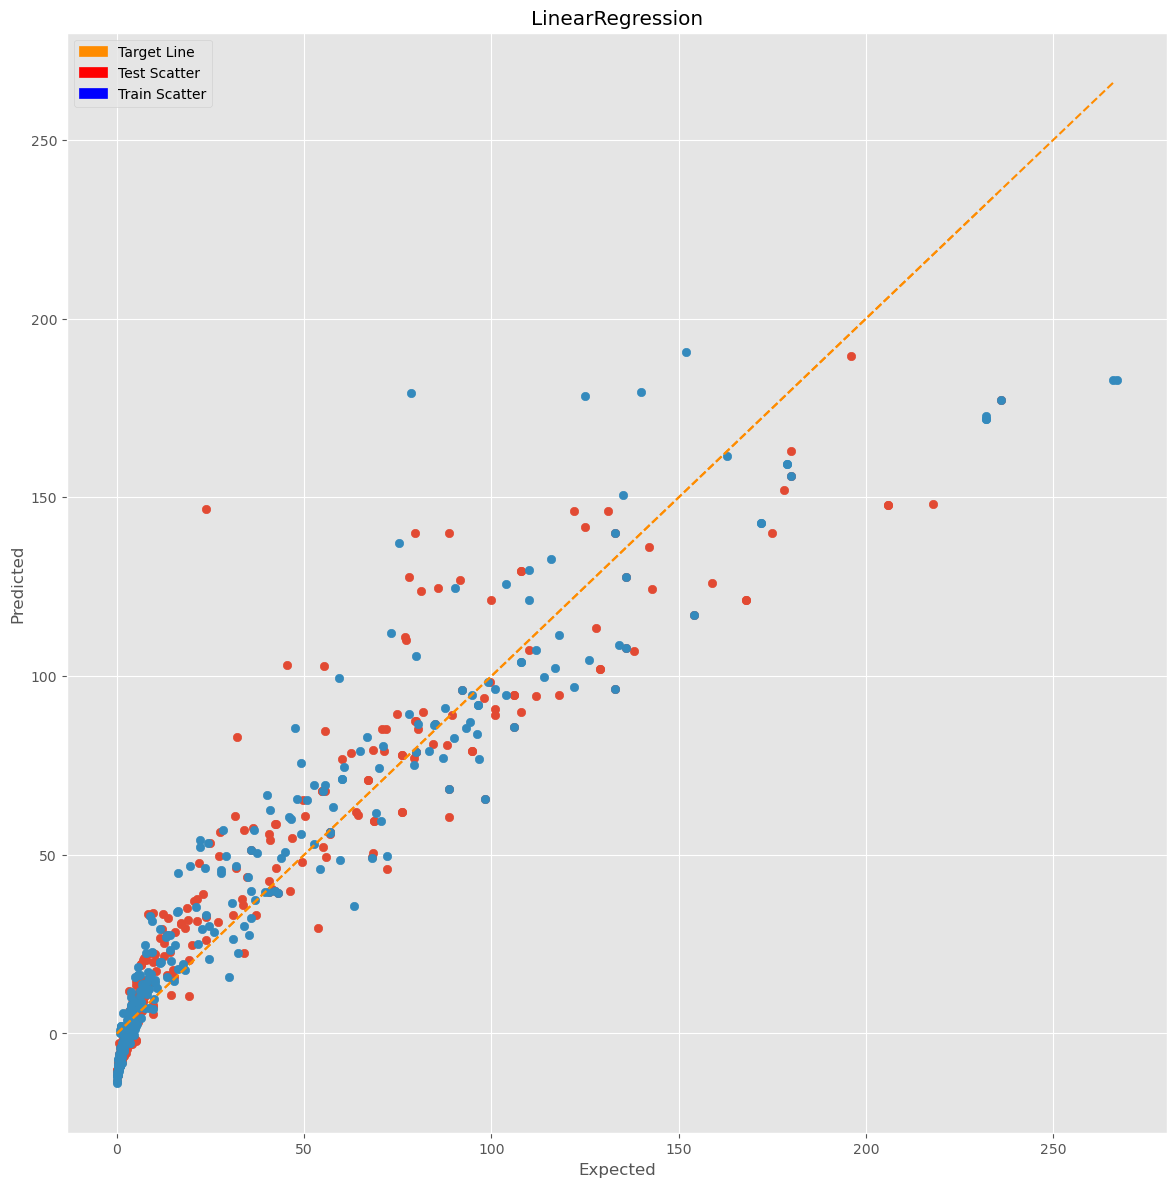

In [65]:
plot_accuracy_scatter_test_vs_train(y_test, model_LR.predict(X_test),y_train, model_LR.predict(X_train),'LinearRegression')

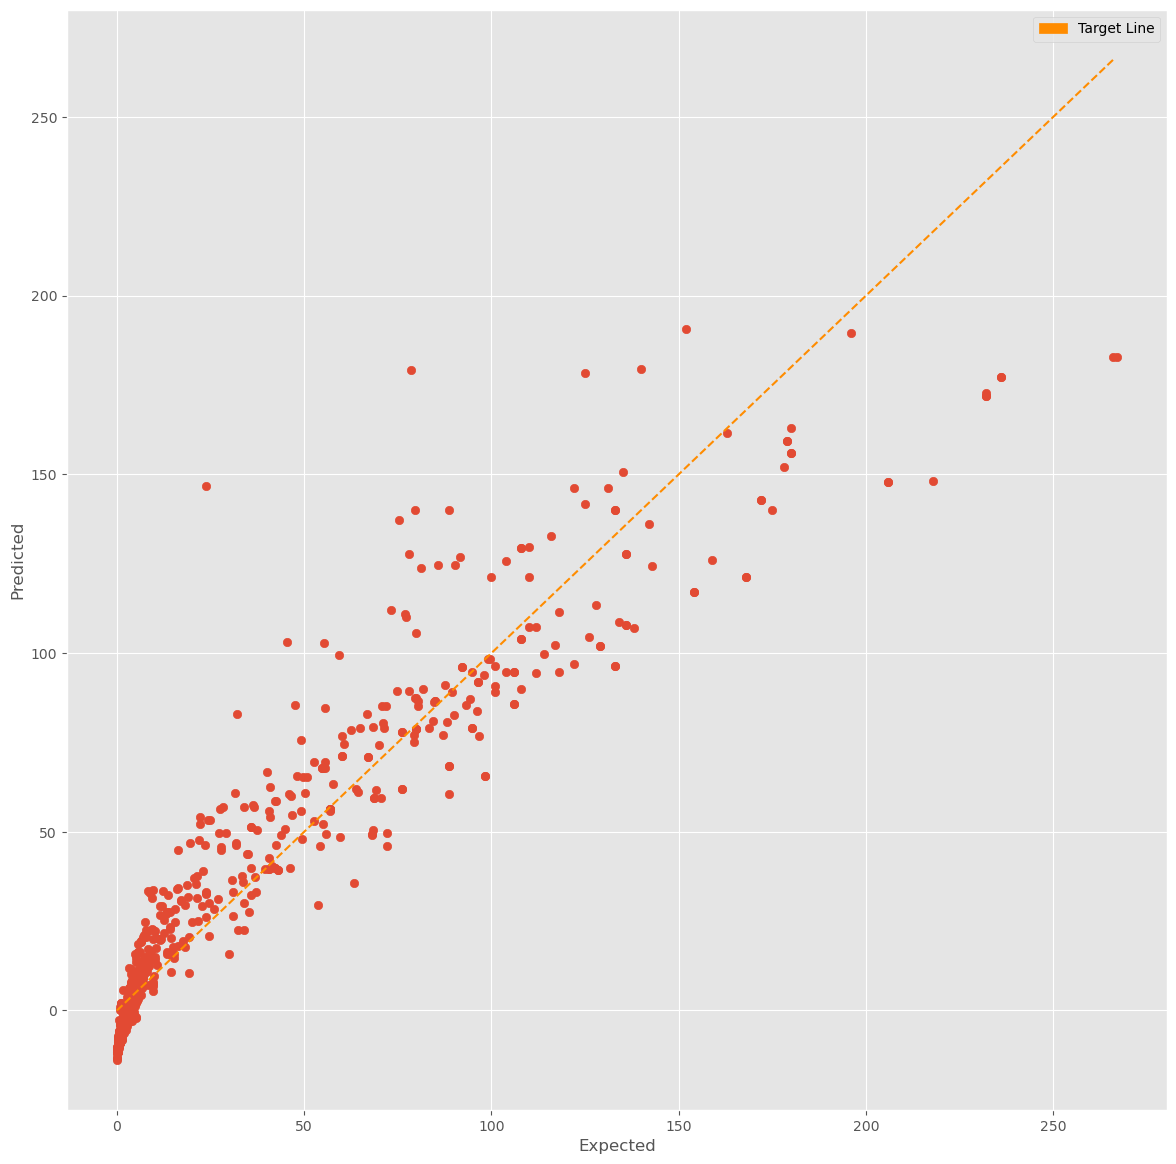

In [66]:
plot_accuracy_scatter(y,model_LR.predict(X))

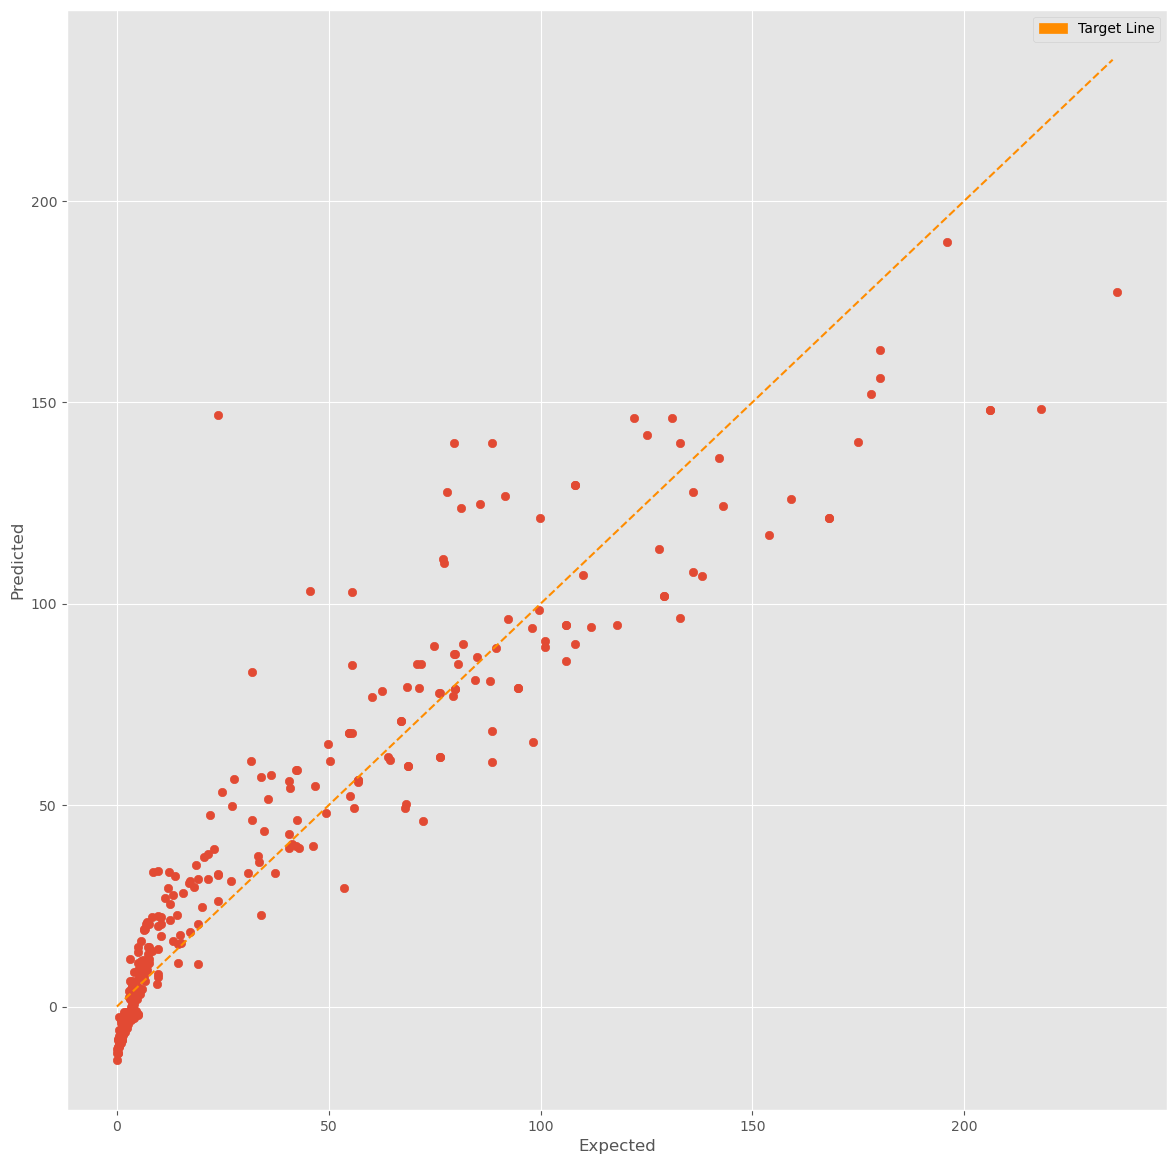

In [67]:
plot_accuracy_scatter(y_test.array,LRP)

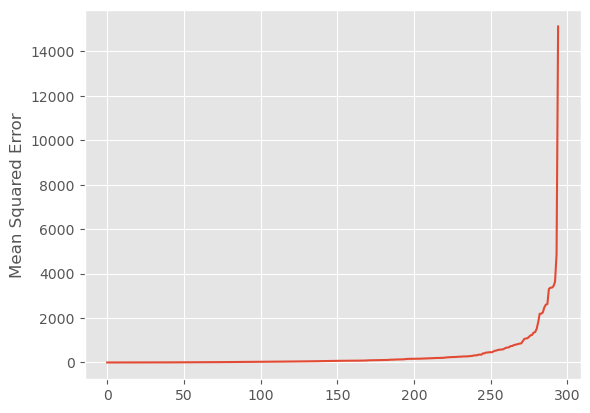

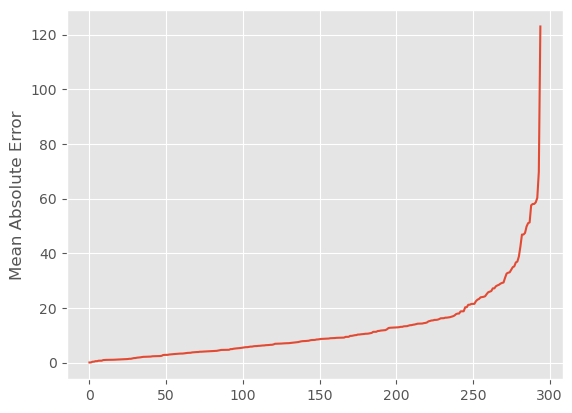

In [68]:
plot_mean_squared_error(y_test.array,LRP)
plot_mean_absolute_error(y_test.array,LRP)

In [69]:
coeff_df = pd.DataFrame(model_LR.coef_,X.columns,columns=['Coefficient'])

coeff_df

,Coefficient
memSize,0.165439
memBusWidth,0.000000
gpuClock,0.016484
memClock,0.000000
tmu,0.358790
rop,0.483055


In [70]:
model_LR.coef_,model_LR.intercept_

(array([0.16543855, 0.        , 0.0164845 , 0.        , 0.3587902 ,
        0.48305466]),
 -21.387636161839545)

# KNeighborsRegressor

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_fixed)

In [72]:
from sklearn.neighbors import KNeighborsRegressor
model_KNR = KNeighborsRegressor(n_neighbors=3)
model_KNR.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [73]:
model_KNR.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [74]:
KNRP = model_KNR.predict(X_test)

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, KNRP))
print('MSE:', metrics.mean_squared_error(y_test, KNRP))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, KNRP)))

MAE: 11.363841807909605
MSE: 378.38063382297554
RMSE: 19.452008477866123


In [76]:
score_all(y_test, model_KNR.predict(X_test))

Mean absolute error: 11.36
Mean squared error: 378.38
Root mean squared error: 19.45
R2 score: 0.87


In [77]:
model_KNR.score(X_test,y_test)

0.8708556505019897

In [78]:
model_KNR.score(X_train,y_train)

0.9262353010515079

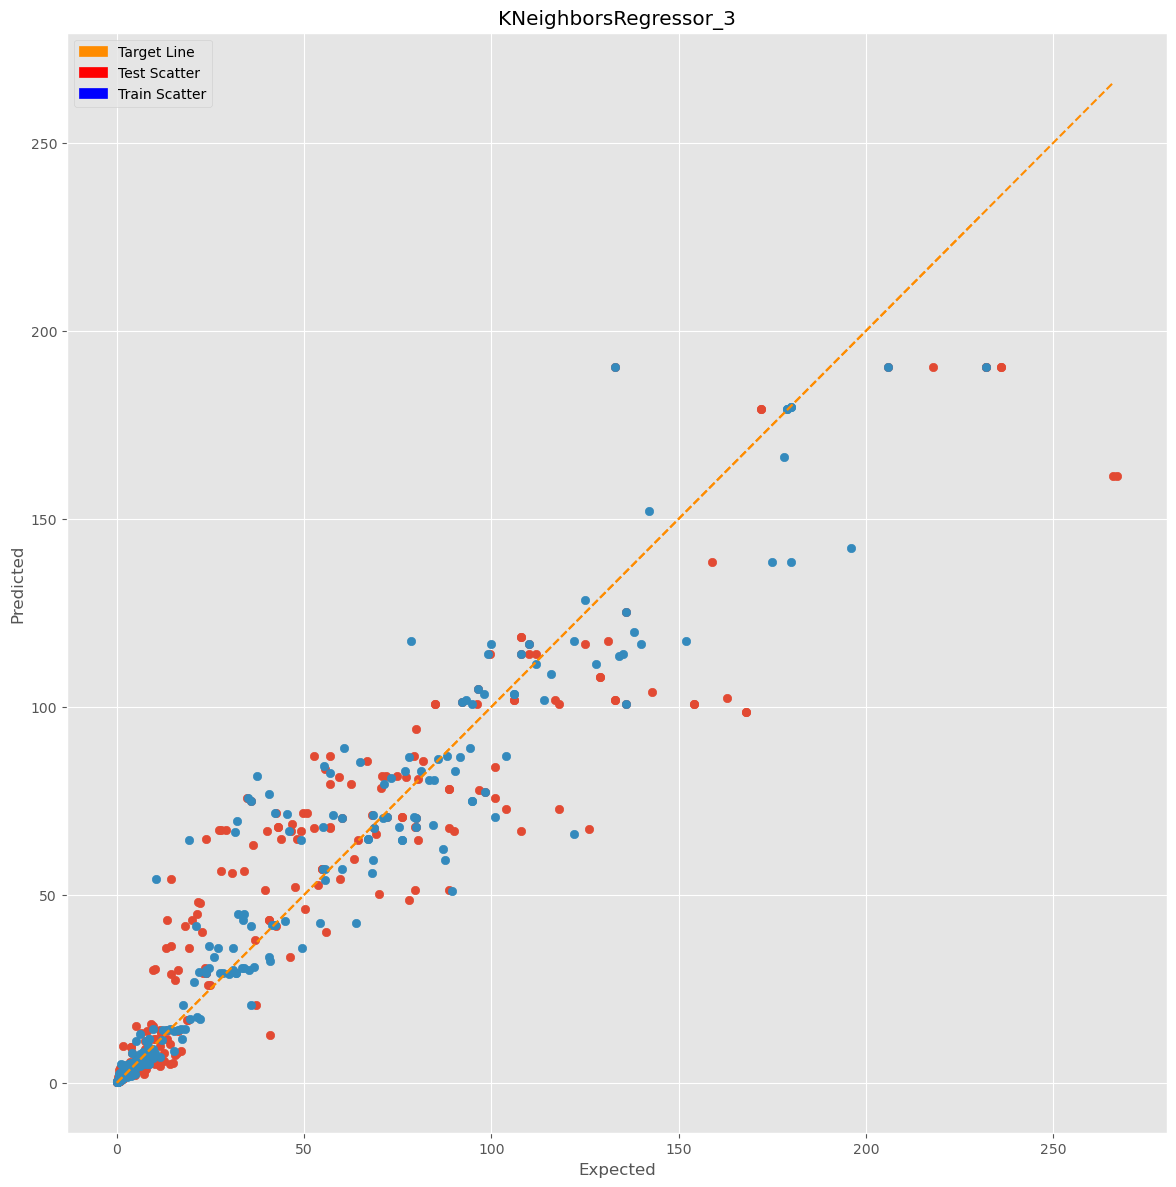

In [79]:
plot_accuracy_scatter_test_vs_train(y_test, model_KNR.predict(X_test),y_train, model_KNR.predict(X_train),'KNeighborsRegressor_3')

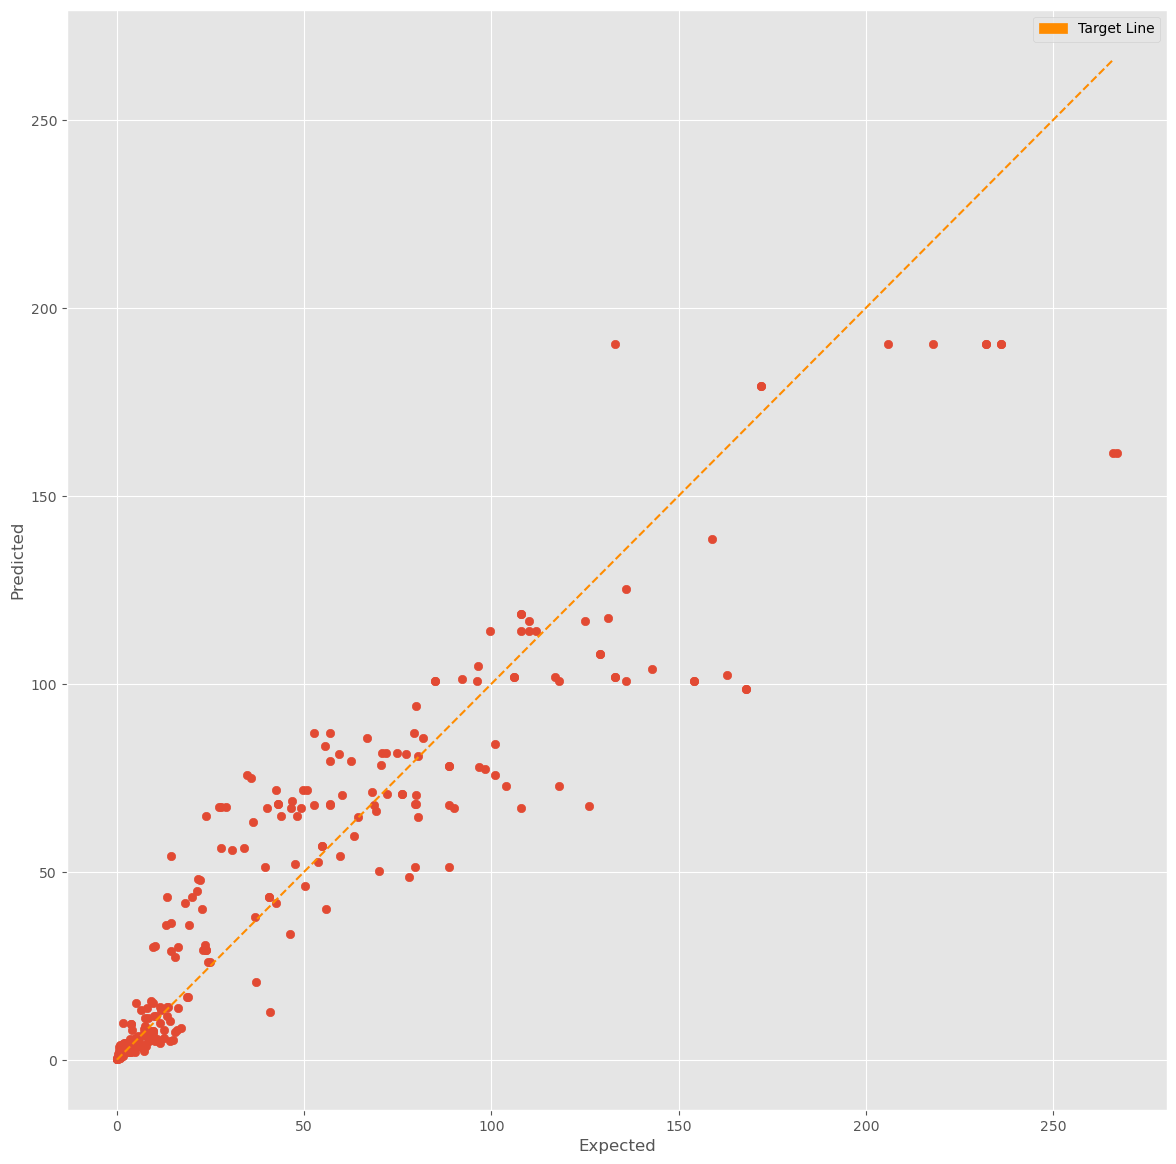

In [80]:
plot_accuracy_scatter(y_test.array,KNRP)

## Cross Validation KNeighbors

In [81]:
score_cross_validation(model_KNR,X,y)

0.8661072934781032

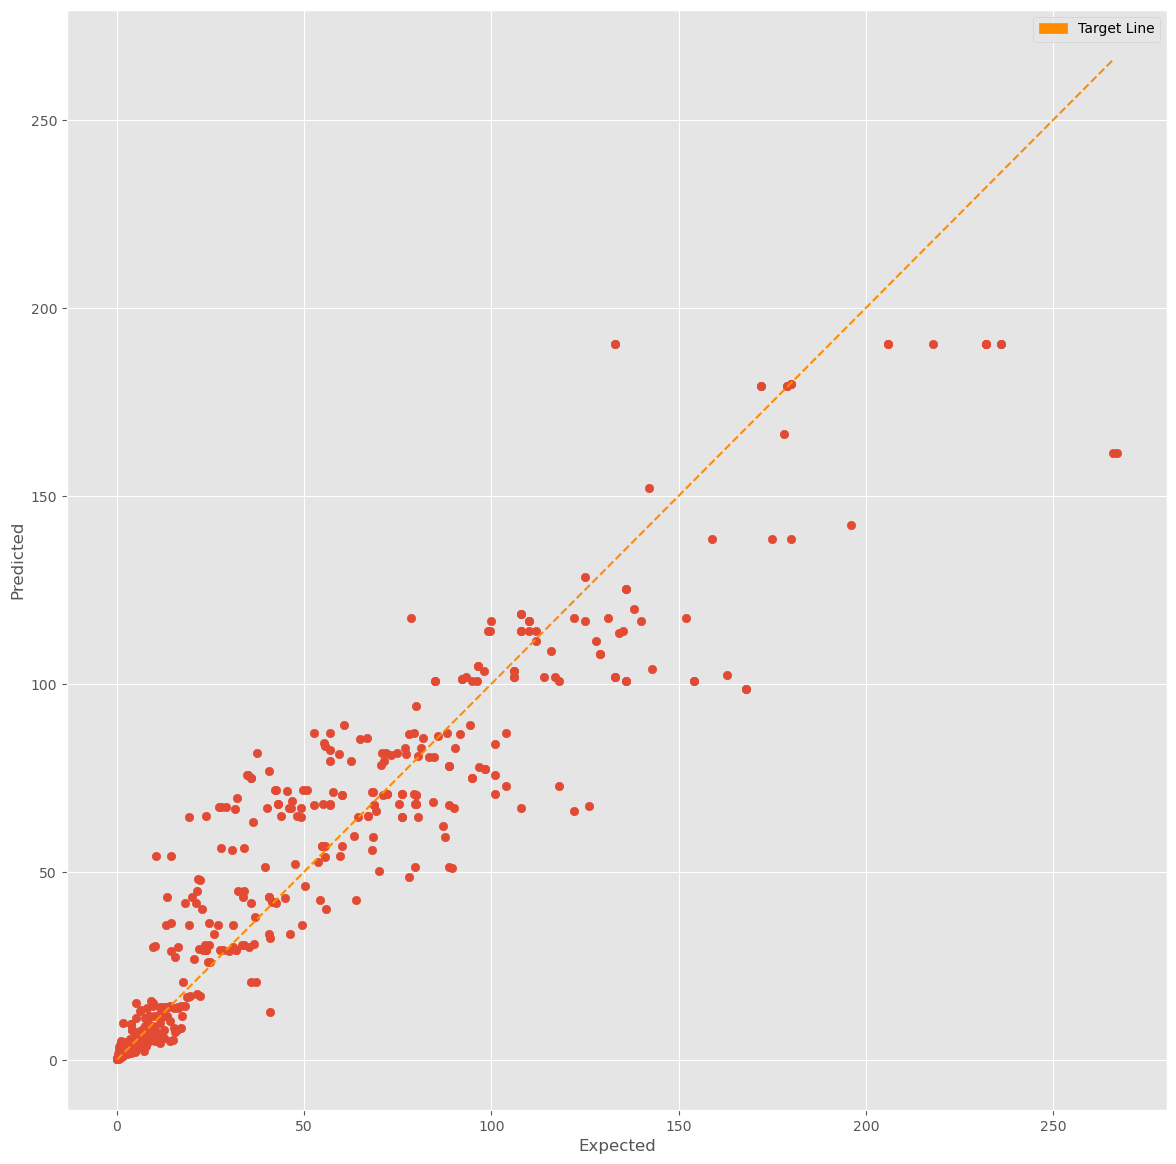

In [82]:
plot_accuracy_scatter(y,model_KNR.predict(X))

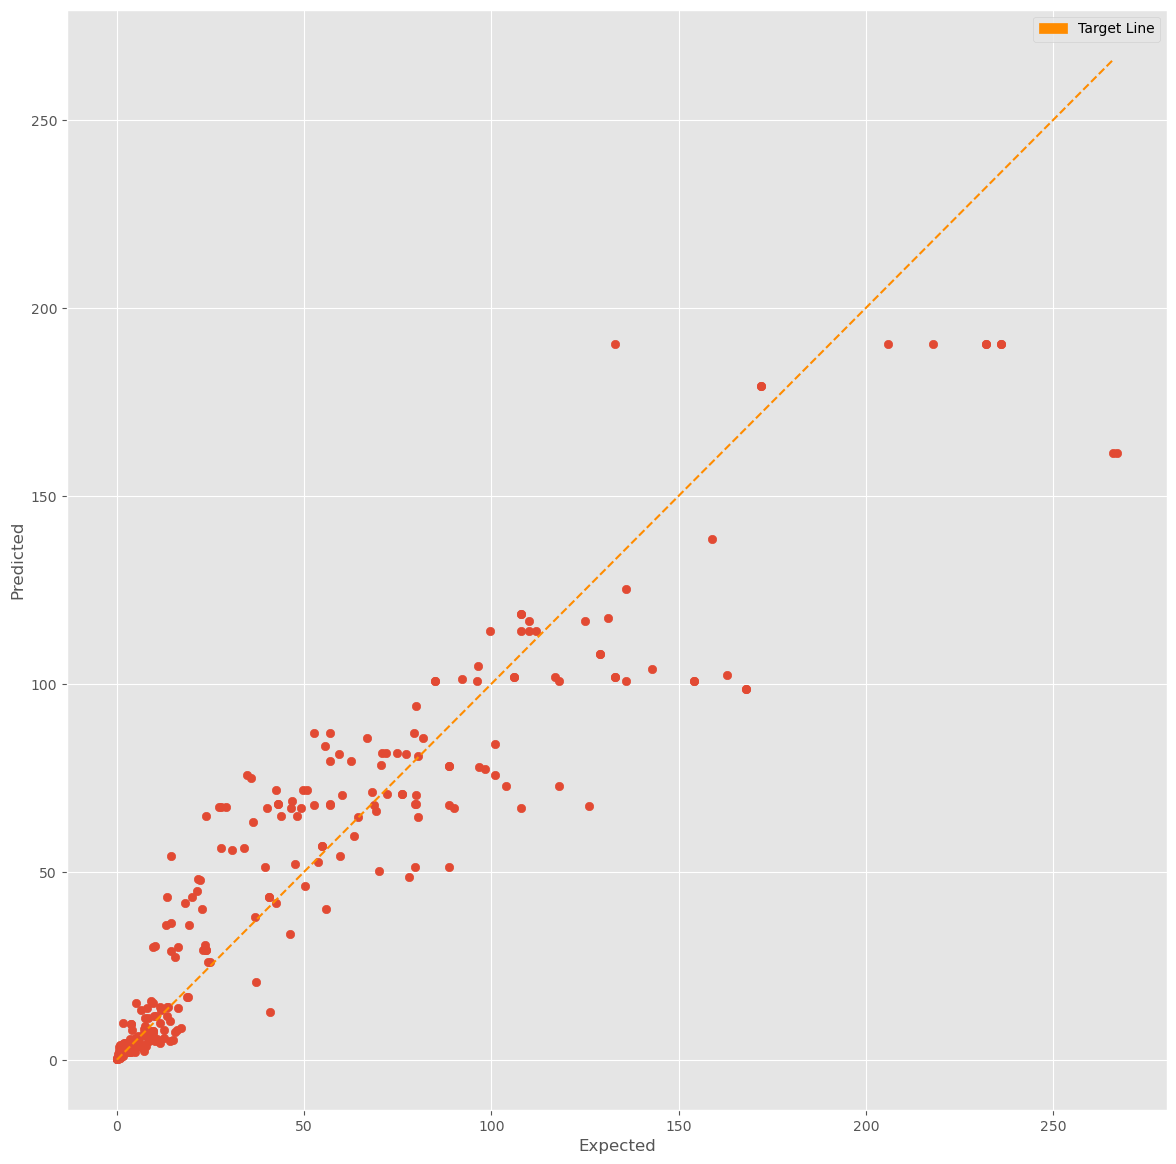

In [83]:
plot_accuracy_scatter(y_test.array,KNRP)


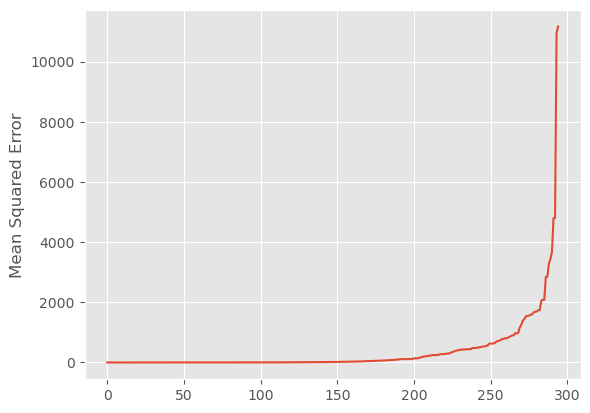

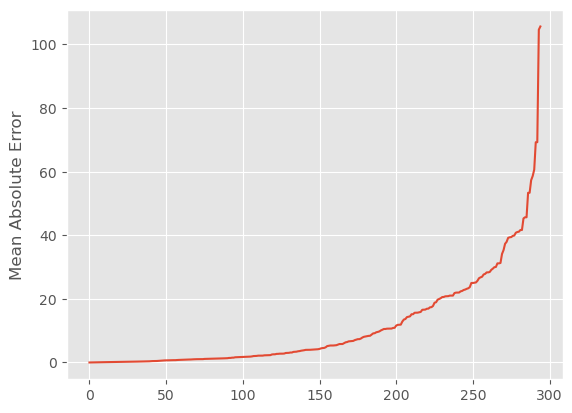

In [84]:
plot_mean_squared_error(y_test.array,KNRP)
plot_mean_absolute_error(y_test.array,KNRP)

# Random Forest

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [86]:
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor(n_jobs=-1,random_state=42)
model_RFR.fit(X_train,y_train)
RFRP=model_RFR.predict(X_test)

In [87]:
model_RFR.score(X_test,y_test)

0.9446611384300375

In [88]:
model_RFR.score(X_train,y_train)

0.9913495398074109

In [89]:
score_all(y_test, model_RFR.predict(X_test))

Mean absolute error: 6.09
Mean squared error: 155.24
Root mean squared error: 12.46
R2 score: 0.94


In [90]:
X_train

,memSize,memBusWidth,gpuClock,memClock,tmu,rop
32,11.000,352.0,1481,1376.0,224,88
461,0.512,256.0,530,799.0,24,16
521,0.512,64.0,625,800.0,8,4
222,4.000,64.0,1923,2000.0,48,32
185,8.000,256.0,1140,1753.0,128,64
...,...,...,...,...,...,...
525,0.512,64.0,625,800.0,8,4
433,1.024,128.0,660,900.0,16,4
13,24.000,384.0,1440,1750.0,288,96
566,0.128,128.0,350,325.0,8,8


In [91]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators':[8, 16,32,64,1000], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [8, 16,32,64,1000], 'max_features': [6]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [8, 16, 32, 64, 1000]},
                         {'bootstrap': [False], 'max_features': [6],
                          'n_estimators': [8, 16, 32, 64, 1000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [92]:
score_all(y_test, grid_search.predict(X_test))

Mean absolute error: 6.29
Mean squared error: 158.03
Root mean squared error: 12.57
R2 score: 0.94


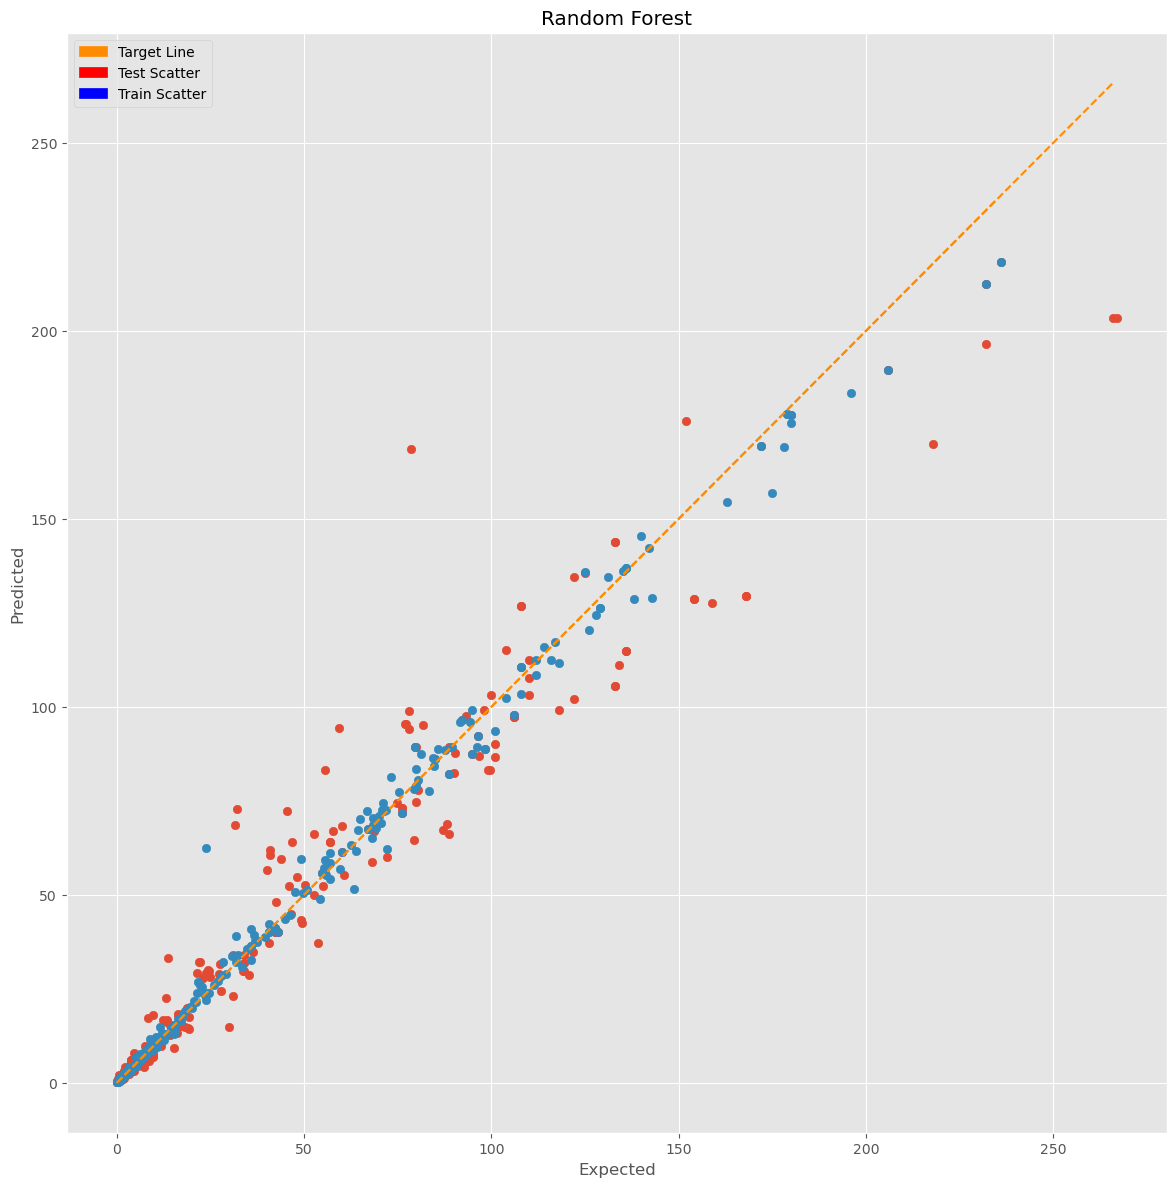

In [93]:
plot_accuracy_scatter_test_vs_train(y_test, grid_search.predict(X_test),y_train, grid_search.predict(X_train),'Random Forest')

## We Find the best Model !! Random Forest

## CV 

In [94]:
score_cross_validation(model_RFR,X,y)

0.9592723118152076

In [95]:
print('MAE:', metrics.mean_absolute_error(y_test, RFRP))
print('MSE:', metrics.mean_squared_error(y_test, RFRP))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RFRP)))

MAE: 6.08624407425343
MSE: 155.24055305462474
RMSE: 12.459556695750646


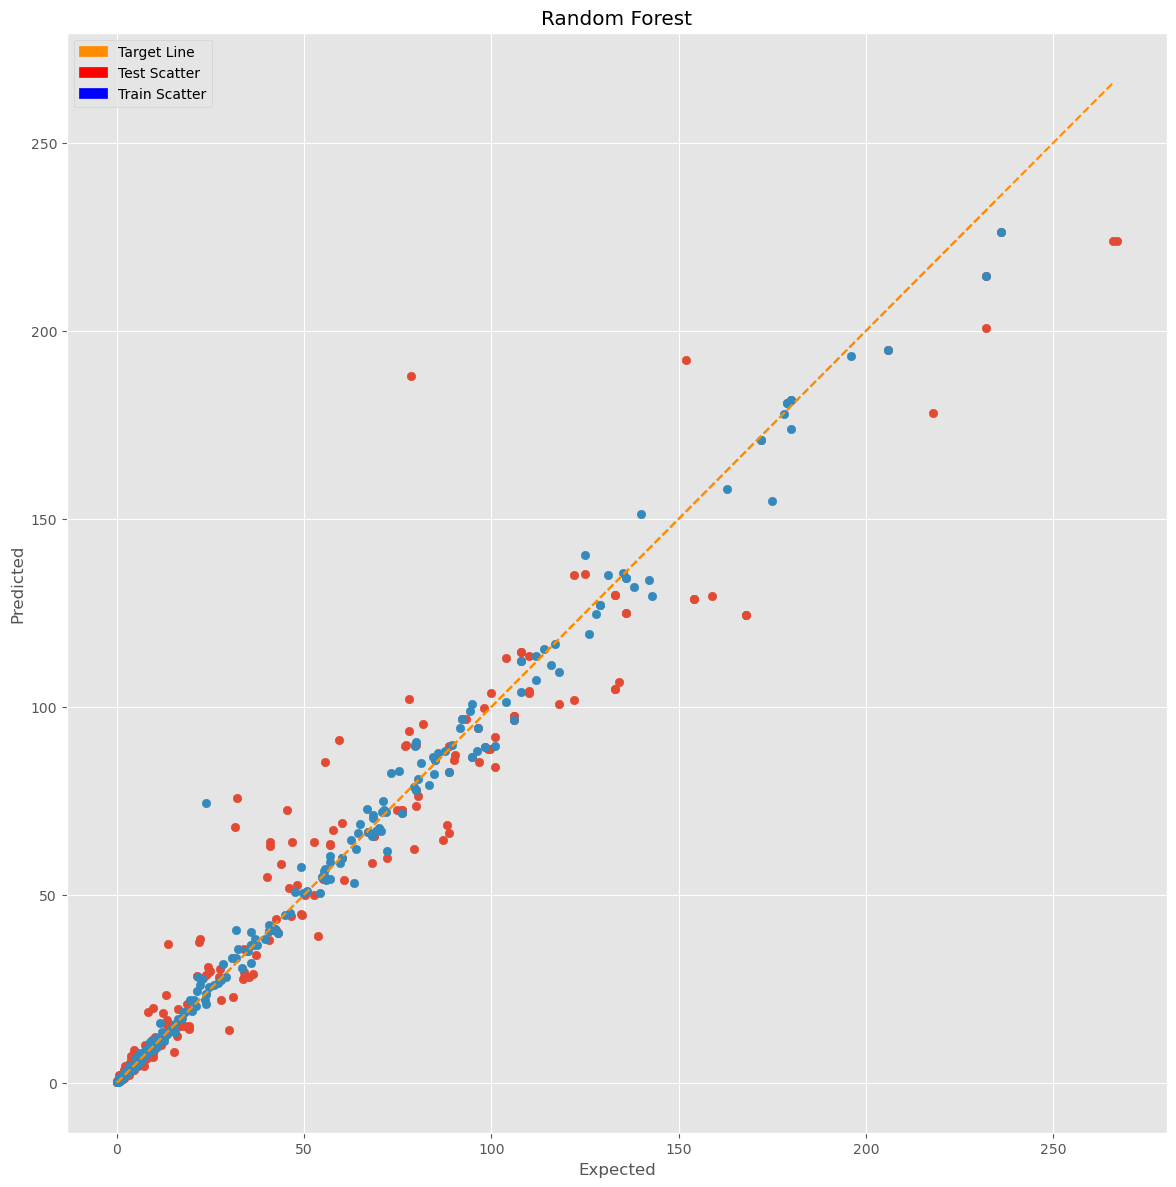

In [96]:
plot_accuracy_scatter_test_vs_train(y_test, model_RFR.predict(X_test),y_train, model_RFR.predict(X_train),'Random Forest')

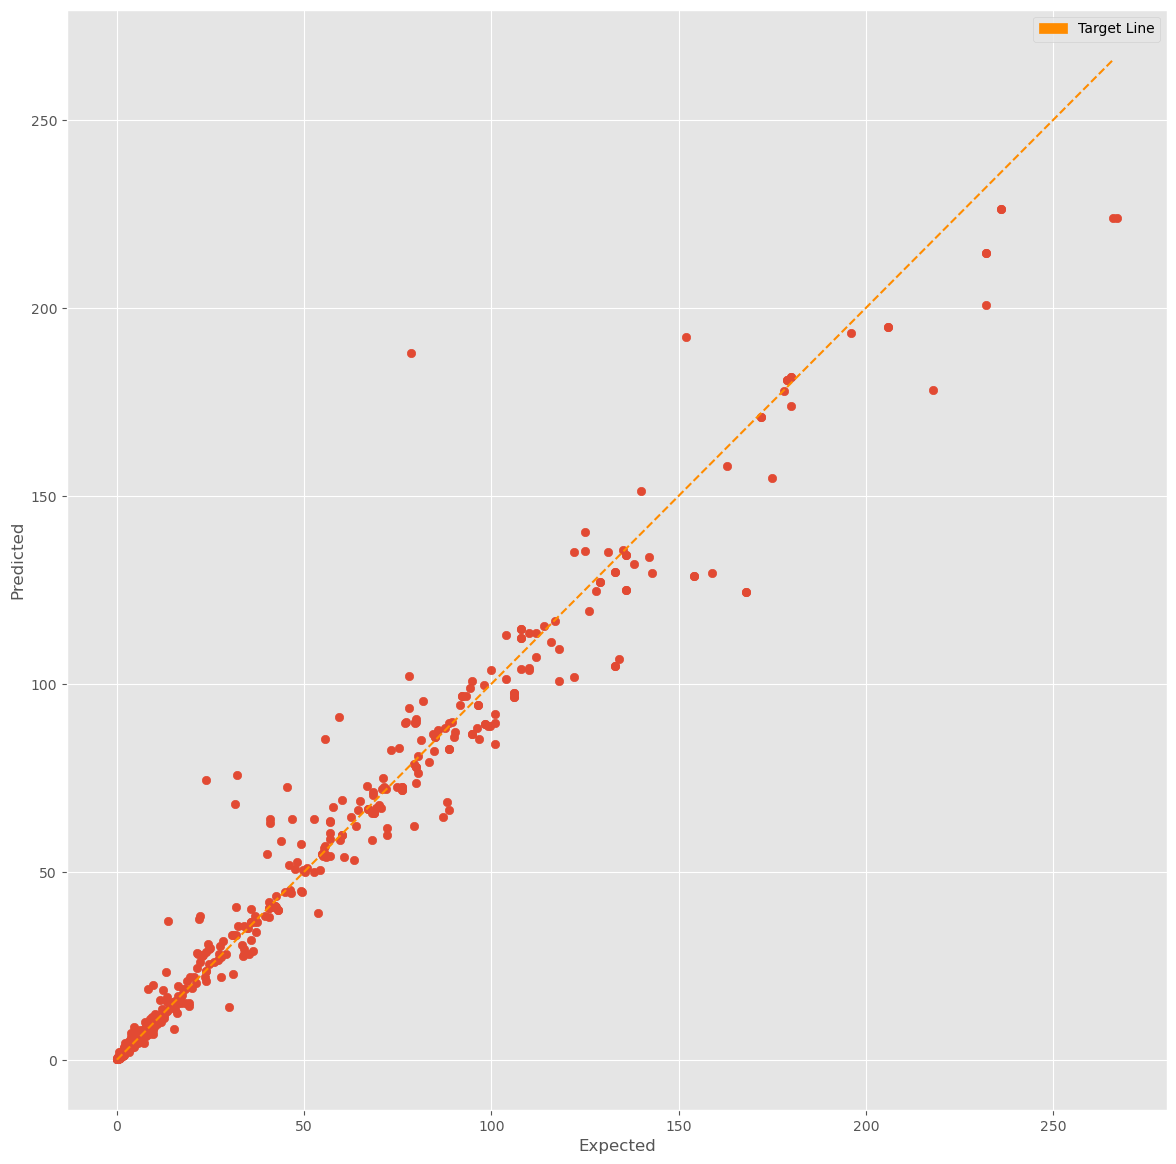

In [97]:
plot_accuracy_scatter(y,model_RFR.predict(X))

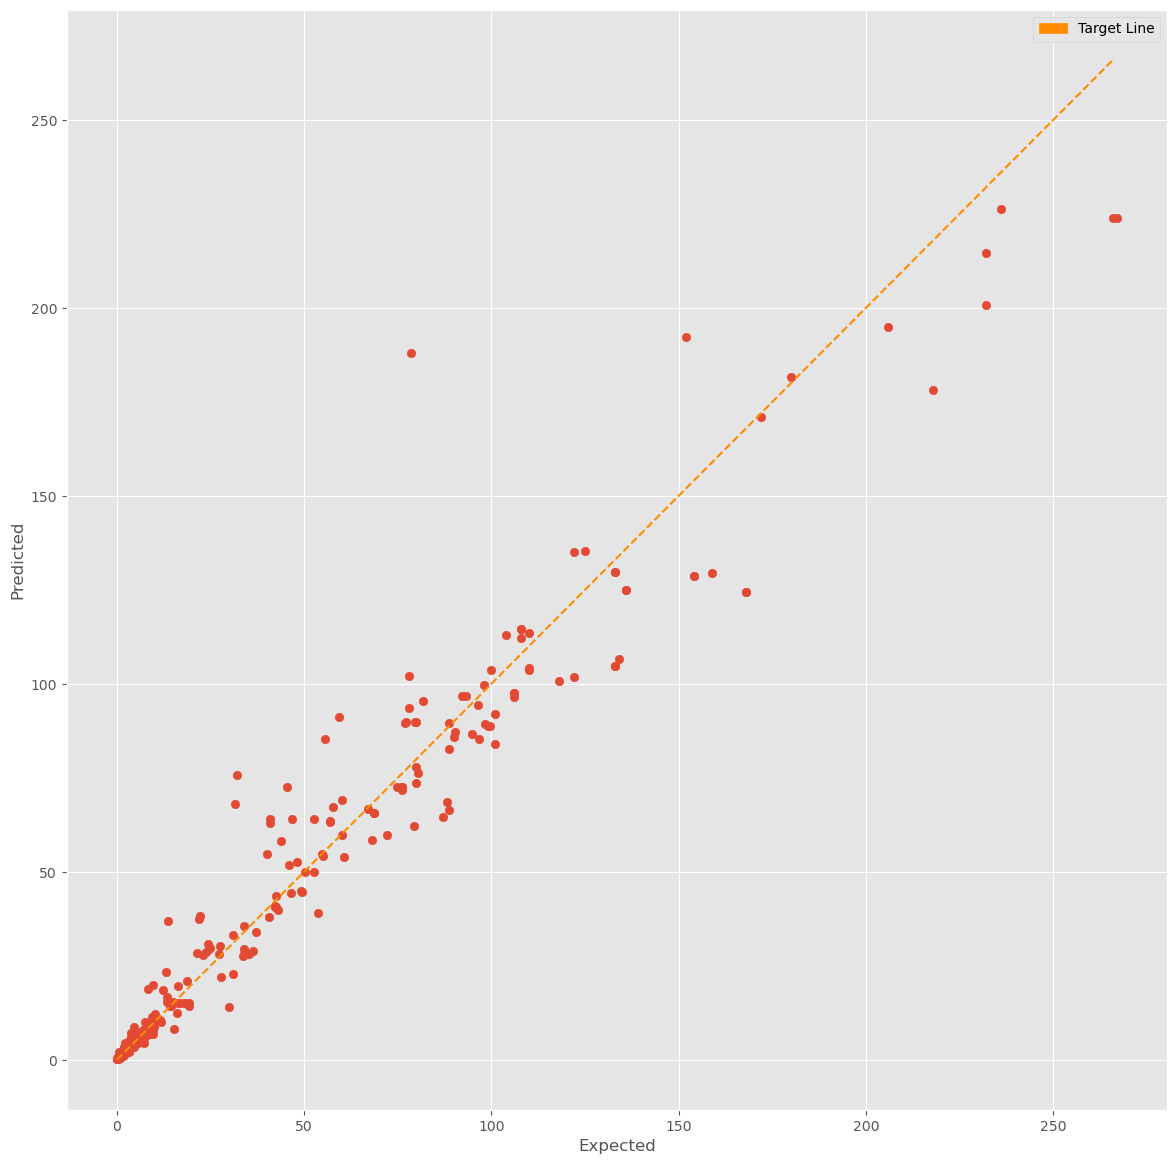

In [98]:
plot_accuracy_scatter(y_test.array,RFRP)

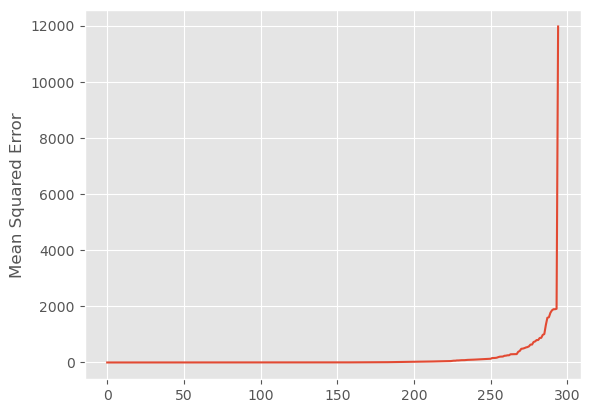

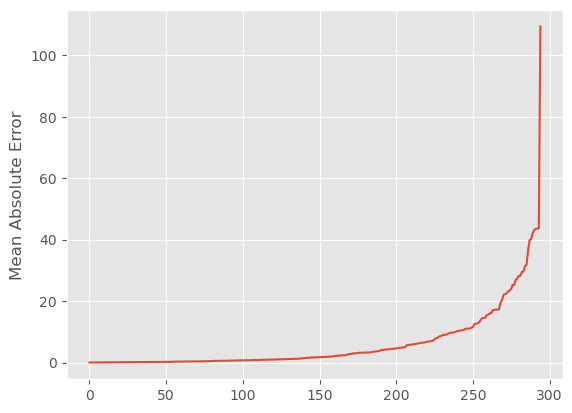

In [99]:
plot_mean_squared_error(y_test.array,RFRP)
plot_mean_absolute_error(y_test.array,RFRP)

# Decision Tree

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_fixed)

In [101]:
from sklearn.tree import DecisionTreeRegressor
model_DTR=DecisionTreeRegressor()
model_DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [102]:
DTRP=model_DTR.predict(X_test)

In [103]:
model_DTR.score(X_test,y_test)

0.9249912740069413

In [104]:
model_DTR.score(X_train,y_train)

0.9998784121444474

In [105]:
score_all(y_test, model_DTR.predict(X_test))

Mean absolute error: 6.52
Mean squared error: 215.48
Root mean squared error: 14.68
R2 score: 0.92


## Cross Validation Decision Tree

In [106]:
score_cross_validation(model_DTR,X,y)

0.9230720080192107

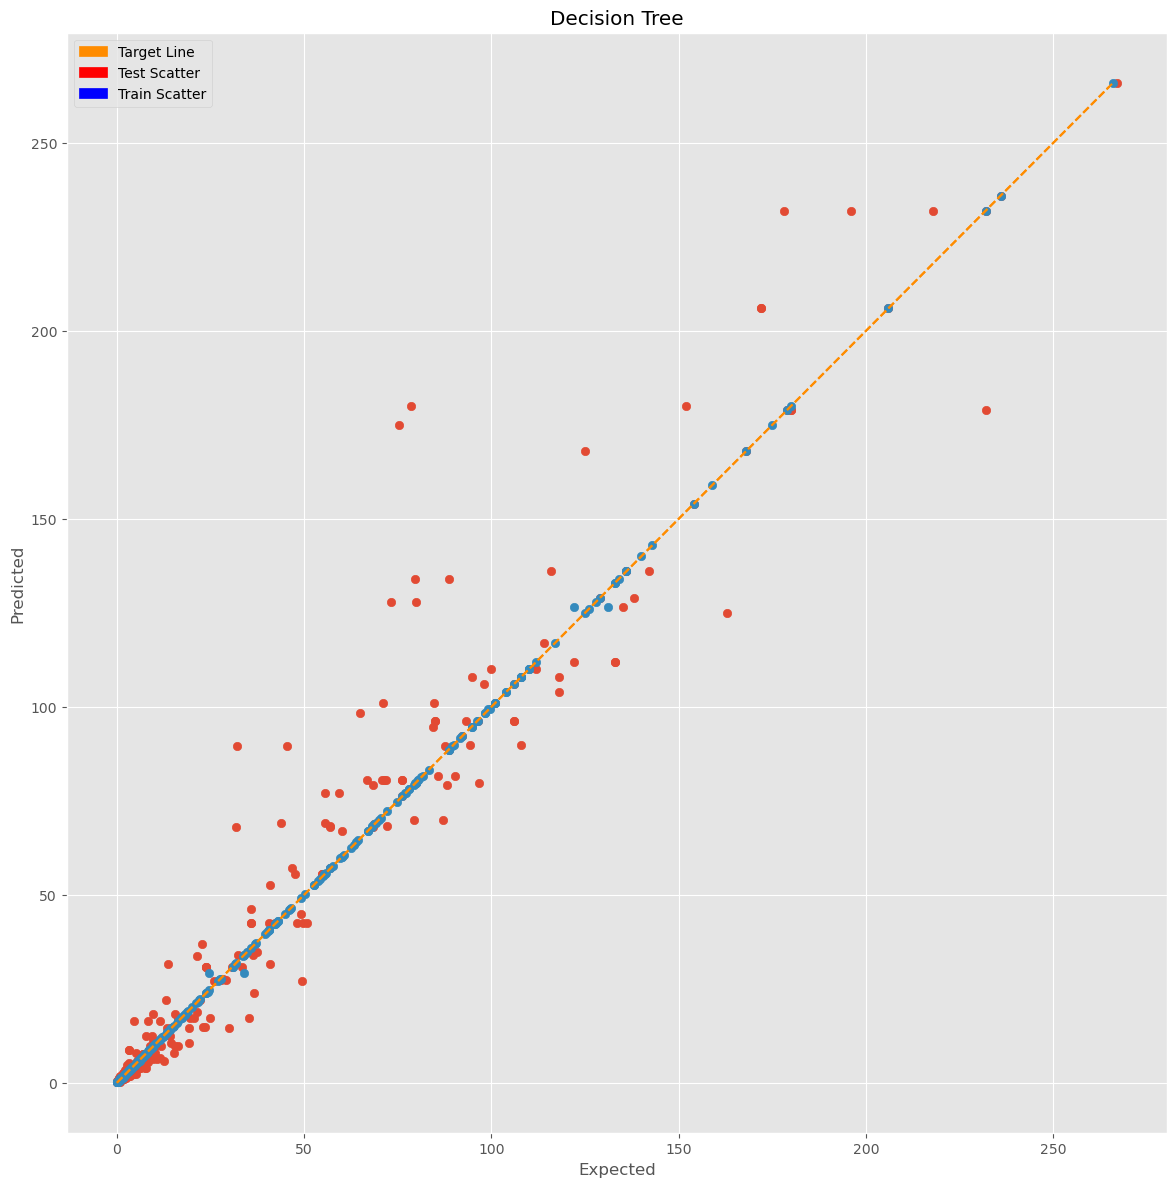

In [107]:
plot_accuracy_scatter_test_vs_train(y_test, model_DTR.predict(X_test),y_train, model_DTR.predict(X_train),'Decision Tree')

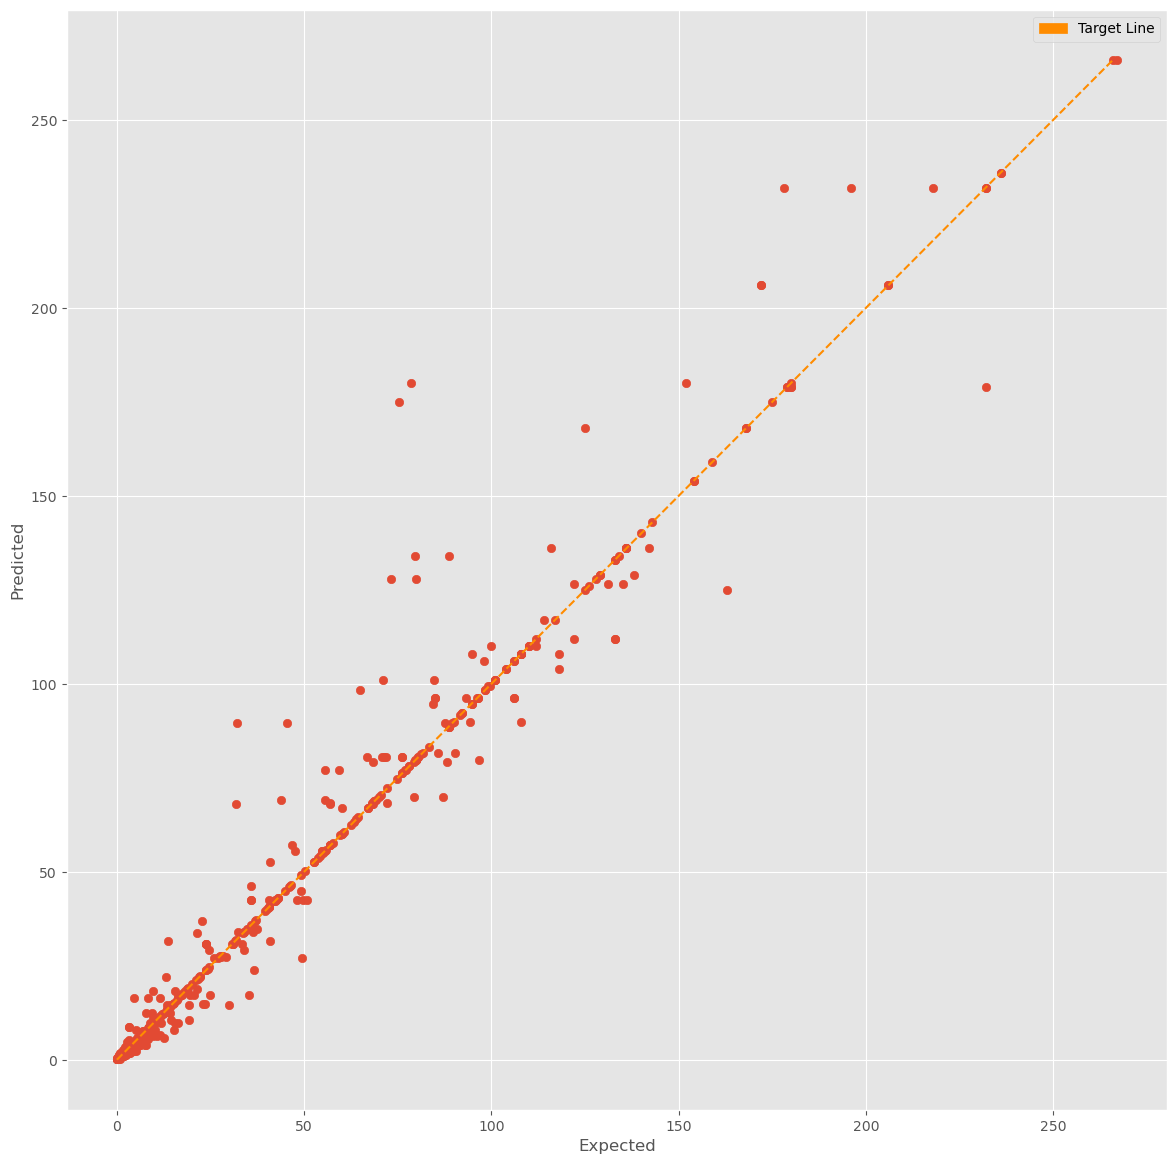

In [108]:
plot_accuracy_scatter(y,model_DTR.predict(X))

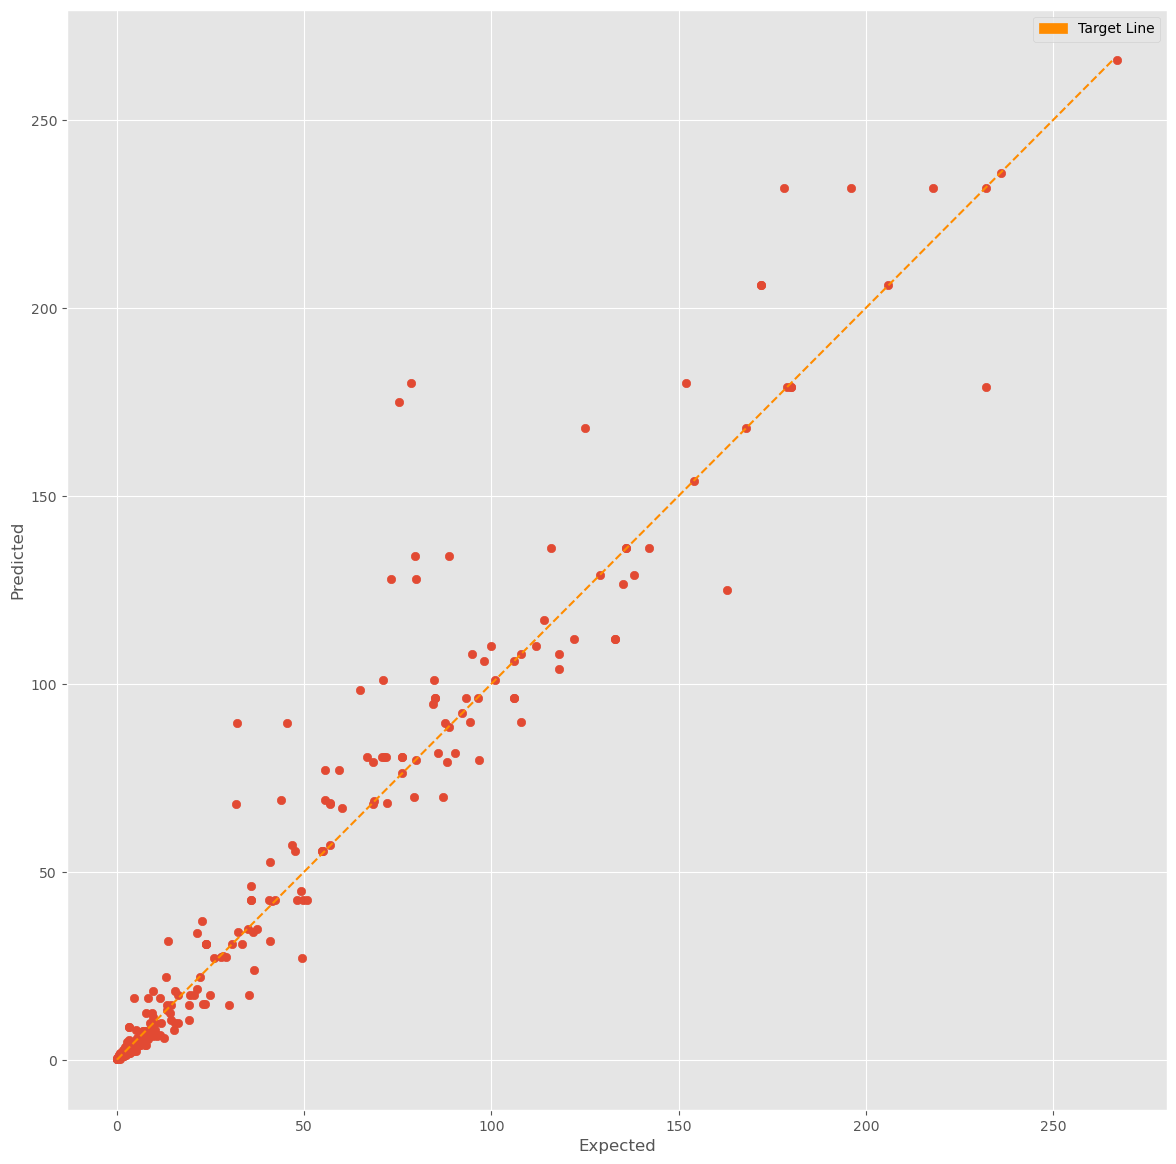

In [109]:
plot_accuracy_scatter(y_test.array,DTRP)

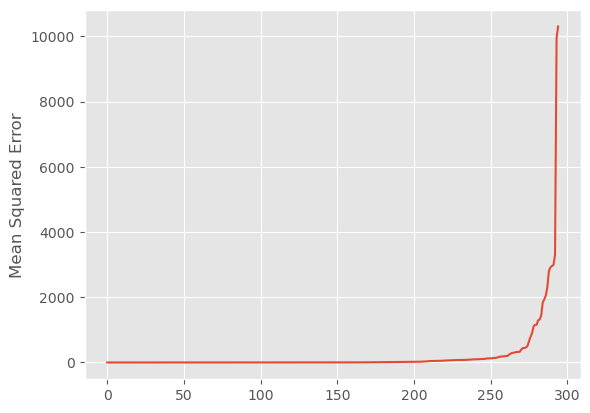

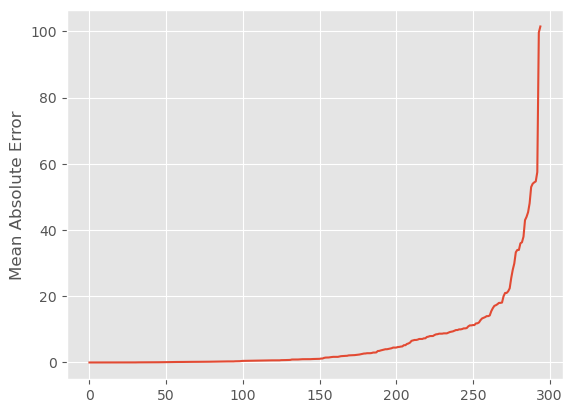

In [110]:
plot_mean_squared_error(y_test.array,DTRP)
plot_mean_absolute_error(y_test.array,DTRP)

## Completely new data

In [111]:
new_specifications_GPU=pd.read_csv("Datasets/gpu_specs_v6.csv")

In [112]:
new_specifications_GPU.head(20)

,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
0,NVIDIA,GeForce RTX 4050,2023.0,8.0,128.0,1925,2250.0,3840.0,120,48,NaN,NaN,No,PCIe 4.0 x16,GDDR6,AD106
1,Intel,Arc A350M,2022.0,4.0,64.0,300,1500.0,768.0,48,24,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
2,Intel,Arc A370M,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
3,Intel,Arc A380,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
4,Intel,Arc A550M,2022.0,8.0,128.0,300,1500.0,2048.0,128,64,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512
5,Intel,Arc A730M,2022.0,12.0,192.0,300,1500.0,3072.0,192,96,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512
6,Intel,Arc A770,2022.0,16.0,256.0,300,1500.0,4096.0,256,128,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512
7,Intel,Arc A770M,2022.0,16.0,256.0,300,1500.0,4096.0,256,128,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512
8,Intel,Arc A780,2022.0,16.0,256.0,300,1093.0,4096.0,256,128,NaN,NaN,No,PCIe 4.0 x16,GDDR6X,DG2-512
9,Intel,Arctic Sound-M,2022.0,16.0,4096.0,900,1200.0,8192.0,256,128,NaN,NaN,No,PCIe 4.0 x16,HBM2e,Arctic Sound


In [113]:
new_specifications_GPU.drop(["pixelShader","vertexShader","igp","manufacturer","releaseYear","unifiedShader"],axis=1,inplace=True)

new_specifications_GPU.dropna(inplace=True)


In [114]:
new_specifications_GPU.count()

productName    2477
memSize        2477
memBusWidth    2477
gpuClock       2477
memClock       2477
tmu            2477
rop            2477
bus            2477
memType        2477
gpuChip        2477
dtype: int64

In [115]:
ProductName=new_specifications_GPU["productName"]
new_specifications_GPU.drop(["productName","bus","memType","gpuChip"],axis=1,inplace=True)

In [116]:
NewCol=model_DTR.predict(new_specifications_GPU)

In [117]:
new_specifications_GPU["Benchmark"]=NewCol

In [118]:
new_specifications_GPU["ProductName"]=ProductName

In [119]:
new_specifications_GPU[new_specifications_GPU["Benchmark"]>200]

,memSize,memBusWidth,gpuClock,memClock,tmu,rop,Benchmark,ProductName
18,12.0,384.0,1260,1188.0,280,96,232.0,GeForce RTX 3080 12 GB
22,24.0,384.0,1560,1313.0,336,112,266.0,GeForce RTX 3090 Ti
25,16.0,256.0,1925,2250.0,304,96,232.0,GeForce RTX 4080
26,20.0,320.0,1895,1325.0,440,144,266.0,GeForce RTX 4080 Ti
27,24.0,384.0,1815,1325.0,544,192,266.0,GeForce RTX 4090
47,16.0,256.0,1925,2250.0,320,128,232.0,Radeon RX 6950 XT
48,8.0,128.0,1800,2250.0,256,128,206.0,Radeon RX 7700 XT
49,12.0,192.0,1800,2250.0,512,192,266.0,Radeon RX 7800 XT
50,16.0,256.0,1800,2250.0,768,256,266.0,Radeon RX 7900 XT
59,80.0,5120.0,1065,1593.0,432,160,236.0,A100 PCIe 80 GB


In [120]:
new_specifications_GPU.to_csv("NewGpuFile_DTREE.csv")

<Axes: >

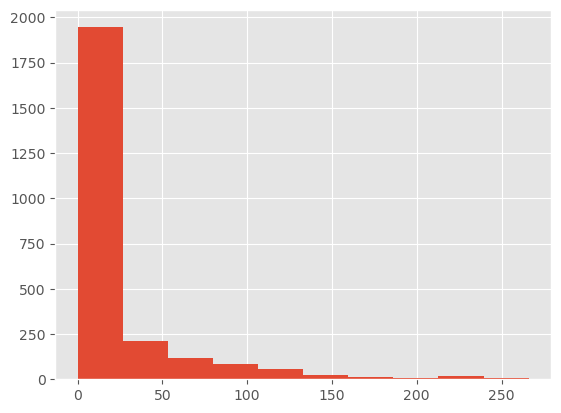

In [121]:
new_specifications_GPU["Benchmark"].hist()

In [122]:
new_specifications_GPU.drop(["ProductName","Benchmark"],axis=1,inplace=True)

In [123]:
NewCol=model_RFR.predict(new_specifications_GPU)

In [124]:
new_specifications_GPU["ProductName"]=ProductName

In [125]:
new_specifications_GPU["Benchmark"]=NewCol

In [126]:
new_specifications_GPU[new_specifications_GPU["Benchmark"]>200]

,memSize,memBusWidth,gpuClock,memClock,tmu,rop,ProductName,Benchmark
19,20.0,320.0,1335,1188.0,320,112,GeForce RTX 3080 Ti 20 GB,200.63
22,24.0,384.0,1560,1313.0,336,112,GeForce RTX 3090 Ti,223.90
26,20.0,320.0,1895,1325.0,440,144,GeForce RTX 4080 Ti,218.02
27,24.0,384.0,1815,1325.0,544,192,GeForce RTX 4090,219.16
49,12.0,192.0,1800,2250.0,512,192,Radeon RX 7800 XT,203.40
50,16.0,256.0,1800,2250.0,768,256,Radeon RX 7900 XT,201.41
88,12.0,384.0,1365,1188.0,320,112,GeForce RTX 3080 Ti,214.71
178,24.0,384.0,1395,1219.0,328,112,GeForce RTX 3090,226.26
221,48.0,384.0,1410,2000.0,336,112,RTX A6000,202.73


In [129]:
new_specifications_GPU.count()

memSize        2477
memBusWidth    2477
gpuClock       2477
memClock       2477
tmu            2477
rop            2477
ProductName    2477
Benchmark      2477
dtype: int64

In [128]:
new_specifications_GPU.describe()

,memSize,memBusWidth,gpuClock,memClock,tmu,rop,Benchmark
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,3.113803,274.874445,700.250303,868.578119,52.736778,21.060961,20.291861
std,7.175399,653.163896,381.582371,509.987396,77.397700,26.324247,35.402869
min,0.000032,32.000000,10.000000,5.000000,0.000000,0.000000,0.087500
25%,0.256000,128.000000,450.000000,400.000000,8.000000,4.000000,0.593308
50%,1.024000,128.000000,650.000000,837.000000,24.000000,12.000000,4.348550
75%,3.000000,256.000000,920.000000,1250.000000,64.000000,32.000000,23.131200
max,128.000000,8192.000000,2331.000000,2257.000000,880.000000,256.000000,226.260000
